In [3]:
!wget -O Dataset.zip https://github.com/AndiAswad/DatasetDM/raw/bf8867b1c30bb5cd8a02054b921742d433436a27/Dataset.zip
print('unziping ...')
!unzip -o -j Dataset.zip

--2024-06-19 15:54:52--  https://github.com/AndiAswad/DatasetDM/raw/bf8867b1c30bb5cd8a02054b921742d433436a27/Dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AndiAswad/DatasetDM/bf8867b1c30bb5cd8a02054b921742d433436a27/Dataset.zip [following]
--2024-06-19 15:54:52--  https://raw.githubusercontent.com/AndiAswad/DatasetDM/bf8867b1c30bb5cd8a02054b921742d433436a27/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23244 (23K) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]  22.70K  --.-KB/s    in 0.002s  

2024-06-19 15:54:52 (14.1 MB/s)

In [157]:
import pandas as pd

# Read the first dataset
data1 = pd.read_csv('final-data-primer.csv')

# Read the second dataset
data2 = pd.read_csv('final-data-sekunder.csv')

# Print the first dataset
print("Data Pertama:")
print(data1)

# Print the second dataset
print("\nData Kedua:")
print(data2)

Data Pertama:
                                             Nama Kost Jenis Kost  \
0    Kost Apik 251 Raya Candi Tipe B Sukun Malang 7...      putri   
1    Kost Apik Prasanjaya Tipe A Lowokwaru Malang S...      putri   
2    Kost Apik Ulfah MT Haryono Tipe A Lowokwaru Ma...      putri   
3    Kost Griya Prima Tipe A Lowokwaru Malang PK19T0B0      putra   
4    Kost Sumbersari 227B Tipe A Lowokwaru Malang F...      putri   
..                                                 ...        ...   
324  Kost Singgahsini Gubeng Kertajaya 21 Tipe B Su...      putri   
325  Kost Singgahsini Gubeng Kertajaya 21 Tipe A Su...      putri   
326  Kost Apik Gubeng Kertajaya 10 Tipe A Surabaya ...      putra   
327  Kost Singgahsini Opung Erwin Tipe A Mojo Surab...     campur   
328  Kost Griya Karunia Kedungdoro Tipe A Sawahan S...      putra   

                                       Fasilitas Kamar  \
0        Kasur, Lemari baju, Bantal, cermin, ventilasi   
1           Kasur, Meja, Lemari Baju, Ven

<h2>Preprocessing<h2>


In [158]:
# Gabungkan kolom Fasilitas kamar dan Fasilitas umum menjadi satu kolom baru Fasilitas
data1['Fasilitas'] = data1['Fasilitas Kamar'] + ', ' + data1['Fasilitas Umum']

# Hapus kolom Fasilitas kamar dan Fasilitas umum yang telah digabungkan
data1.drop(columns=['Fasilitas Kamar', 'Fasilitas Umum'], inplace=True)

# Print hasilnya
print(data1)

                                             Nama Kost Jenis Kost  \
0    Kost Apik 251 Raya Candi Tipe B Sukun Malang 7...      putri   
1    Kost Apik Prasanjaya Tipe A Lowokwaru Malang S...      putri   
2    Kost Apik Ulfah MT Haryono Tipe A Lowokwaru Ma...      putri   
3    Kost Griya Prima Tipe A Lowokwaru Malang PK19T0B0      putra   
4    Kost Sumbersari 227B Tipe A Lowokwaru Malang F...      putri   
..                                                 ...        ...   
324  Kost Singgahsini Gubeng Kertajaya 21 Tipe B Su...      putri   
325  Kost Singgahsini Gubeng Kertajaya 21 Tipe A Su...      putri   
326  Kost Apik Gubeng Kertajaya 10 Tipe A Surabaya ...      putra   
327  Kost Singgahsini Opung Erwin Tipe A Mojo Surab...     campur   
328  Kost Griya Karunia Kedungdoro Tipe A Sawahan S...      putra   

                    Harga  rating Krebersihan  rating Kenyamanan  \
0       Rp. 802.000/bulan                 4.5                4.5   
1       Rp. 913.000/bulan          

In [159]:
# Hapus kolom-kolom yang tidak diperlukan
columns_to_drop = ['Nama Kost', 'Jenis Kost', 'rating Krebersihan', 'rating Kenyamanan',
                   'rating Keamanan', 'rating Harga', 'rating Fasilitas kamar',
                   'rating Fasislitas Umum', 'Jarak Ke kampus', 'Total Rating']
data1.drop(columns=columns_to_drop, inplace=True)
data1.rename(columns={'Total Rating': 'Rating'}, inplace=True)

data2.rename(columns={'harga': 'Harga', 'fasilitas': 'Fasilitas'}, inplace=True)

# Hapus kolom 'Nama' pada data2
data2.drop(columns=['nama', 'ranting'], inplace=True)

# Print hasilnya
print(data1)
print(data2)

                    Harga                                          Fasilitas
0       Rp. 802.000/bulan  Kasur, Lemari baju, Bantal, cermin, ventilasi,...
1       Rp. 913.000/bulan  Kasur, Meja, Lemari Baju, Ventilasi, Kursi, KM...
2       Rp. 813.750/bulan  Kasur, Meja, Lemari Baju, Bantal, Cermin, KM.l...
3       Rp. 850.000/bulan  kasur, meja, lemari baju, ventilasi, cermin, K...
4       Rp. 700.000/bulan  kasur, Meja, Lemari Baju, Ventilasi, Bantal, K...
..                    ...                                                ...
324     Rp. 980.000/bulan  kasur, lemari baju, kursi, cermin, jendela, Li...
325   Rp. 1.540.000/bulan  AC, kasur, lemari baju, banta, cermin, KM.dala...
326     Rp. 875.000/bulan  Kasur, meja, lemari baju, ventilasi, jendela, ...
327  Rp. 1. 605.000/bulan  AC, kasur, TV, lemari baju, bantal, KM.dalam, ...
328   Rp. 1.050.000/bulan  AC, kasur, meja, lemari baju, ventilasi, Wifi,...

[329 rows x 2 columns]
            Harga                                   

In [160]:
combined_data = pd.concat([data1, data2], ignore_index=True)

# Print hasil gabungan
print(combined_data)

                  Harga                                          Fasilitas
0     Rp. 802.000/bulan  Kasur, Lemari baju, Bantal, cermin, ventilasi,...
1     Rp. 913.000/bulan  Kasur, Meja, Lemari Baju, Ventilasi, Kursi, KM...
2     Rp. 813.750/bulan  Kasur, Meja, Lemari Baju, Bantal, Cermin, KM.l...
3     Rp. 850.000/bulan  kasur, meja, lemari baju, ventilasi, cermin, K...
4     Rp. 700.000/bulan  kasur, Meja, Lemari Baju, Ventilasi, Bantal, K...
...                 ...                                                ...
1424          Rp650.000                K. Mandi Dalam ·Kasur ·Akses 24 Jam
1425          Rp650.000                                Kasur ·Akses 24 Jam
1426        Rp1.500.000      K. Mandi Dalam ·WiFi ·AC ·Kloset Duduk ·Kasur
1427        Rp1.050.000      K. Mandi Dalam ·WiFi ·AC ·Kloset Duduk ·Kasur
1428          Rp800.000                        K. Mandi Dalam ·WiFi ·Kasur

[1429 rows x 2 columns]


In [161]:
jumlah_data_kosong = combined_data.isnull().sum()
print("Jumlah data kosong per kolom:")
print(jumlah_data_kosong)



Jumlah data kosong per kolom:
Harga        0
Fasilitas    7
dtype: int64


In [162]:
# Menghapus baris yang memiliki data kosong
data_bersih = combined_data.dropna()
combined_data = data_bersih
combined_data.isnull().sum()

Harga        0
Fasilitas    0
dtype: int64

In [163]:
# Membersihkan kolom Harga pada combined_data
combined_data['Harga'] = combined_data['Harga'].replace('[^\d]', '', regex=True)
print(combined_data['Harga'])
print(combined_data)

0        802000
1        913000
2        813750
3        850000
4        700000
         ...   
1424     650000
1425     650000
1426    1500000
1427    1050000
1428     800000
Name: Harga, Length: 1422, dtype: object
        Harga                                          Fasilitas
0      802000  Kasur, Lemari baju, Bantal, cermin, ventilasi,...
1      913000  Kasur, Meja, Lemari Baju, Ventilasi, Kursi, KM...
2      813750  Kasur, Meja, Lemari Baju, Bantal, Cermin, KM.l...
3      850000  kasur, meja, lemari baju, ventilasi, cermin, K...
4      700000  kasur, Meja, Lemari Baju, Ventilasi, Bantal, K...
...       ...                                                ...
1424   650000                K. Mandi Dalam ·Kasur ·Akses 24 Jam
1425   650000                                Kasur ·Akses 24 Jam
1426  1500000      K. Mandi Dalam ·WiFi ·AC ·Kloset Duduk ·Kasur
1427  1050000      K. Mandi Dalam ·WiFi ·AC ·Kloset Duduk ·Kasur
1428   800000                        K. Mandi Dalam ·WiFi ·Kasur

[1

In [164]:
# # Path to save the combined data
# output_file_path = folder_path + 'Data_Gabungan.csv'

# # Save the combined data to a CSV file
# combined_data.to_csv(output_file_path, index=False)

# # Print path to the saved file
# print("Data gabungan telah disimpan di:", output_file_path)

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import display
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np

### Proses Pembuatan Model Setelah selesai pengolahan data

In [4]:
data = pd.read_csv('Data_fix.csv')

# print(data)
display(data)

Harga  Fasilitas  0utcome
0      802000          0        2
1      913000          0        2
2      813750          0        2
3      850000          0        2
4      700000          0        2
...       ...        ...      ...
1417   650000          1        0
1418   650000          0        1
1419  1500000          2        1
1420  1050000          2        1
1421   800000          1        1

[1422 rows x 3 columns]

In [5]:
data.rename(columns={'0utcome': 'Outcome'}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Harga      1422 non-null   int64
 1   Fasilitas  1422 non-null   int64
 2   Outcome    1422 non-null   int64
dtypes: int64(3)
memory usage: 33.5 KB


In [7]:
# Split features (X) and target (y)
X = data[['Harga', 'Fasilitas']]
y = data['Outcome']


<h2> Random Forest<h2>

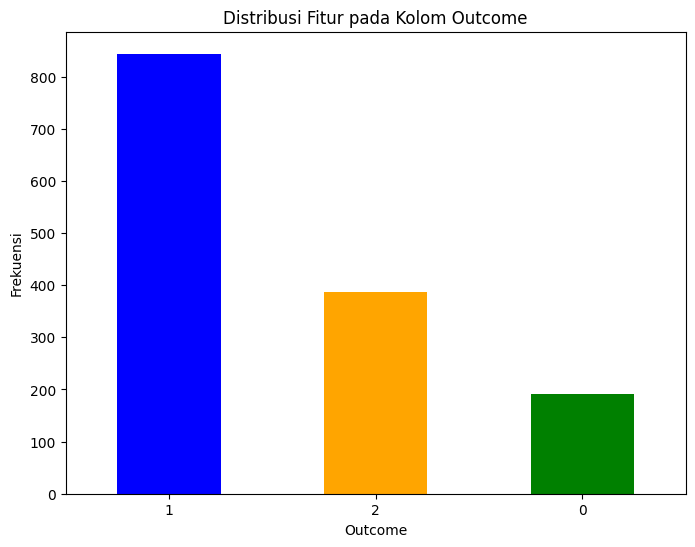

In [170]:
# outcome_counts = data['Outcome'].value_counts()
outcome_counts = y.value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

Sebelum Resampling

In [171]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [172]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [173]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [174]:
# Predict test set
y_pred = model.predict(X_test)

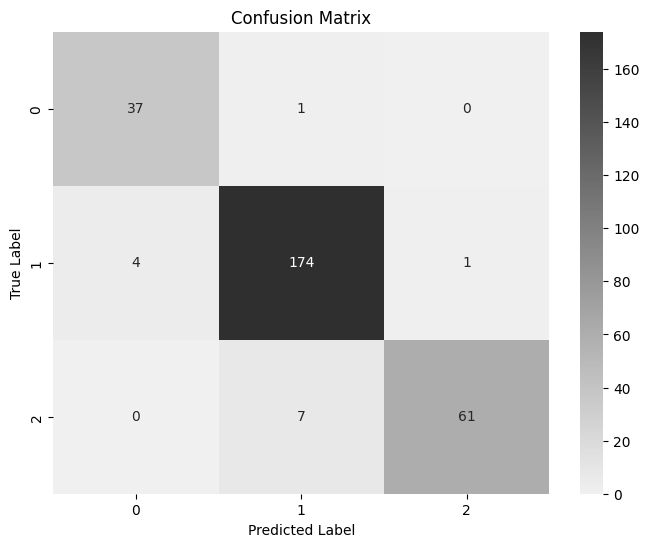

In [175]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_RandomFOrest.png')

# Menampilkan plot
plt.show()

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



In [177]:
# Evaluate model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9543859649122807


In [178]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = scaler.transform([[harga, fasilitas]])
    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga murah


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Setelah Data Resampling

In [8]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

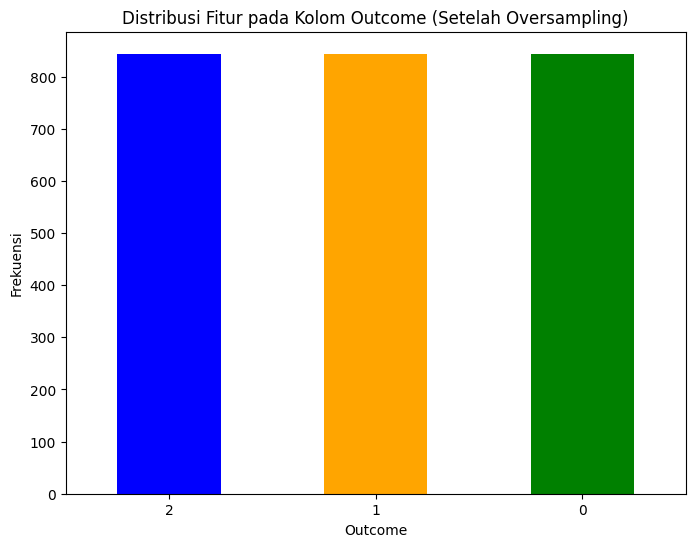

In [9]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome (Setelah Oversampling)')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict test set
y_pred = model.predict(X_test)

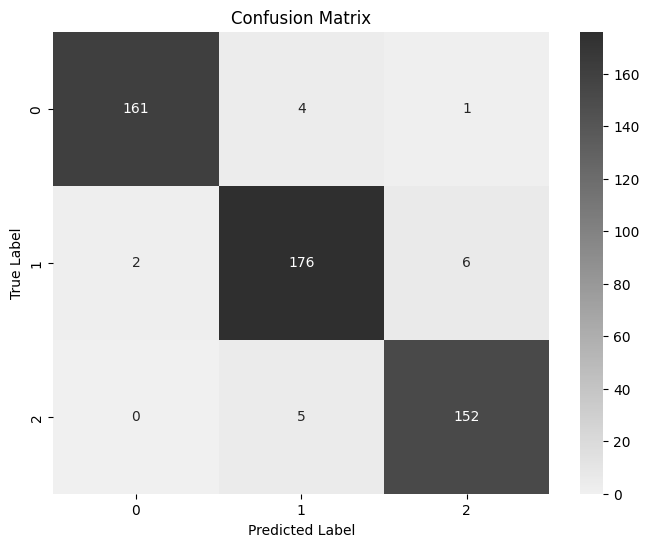

In [14]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_RandomFOrest.png')

# Menampilkan plot
plt.show()

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.97      0.96       157

    accuracy                           0.96       507
   macro avg       0.97      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



In [187]:
# Evaluate model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9644970414201184


In [188]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = scaler.transform([[harga, fasilitas]])
    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga murah


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Penerapan Chi-square sebelum resampling

In [189]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X, y)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 65213284.94208518, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 8.339473319272175, p-value: 0.015456329863553666


In [190]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [192]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7578947368421053
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.89      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.67       285
weighted avg       0.75      0.76      0.75       285



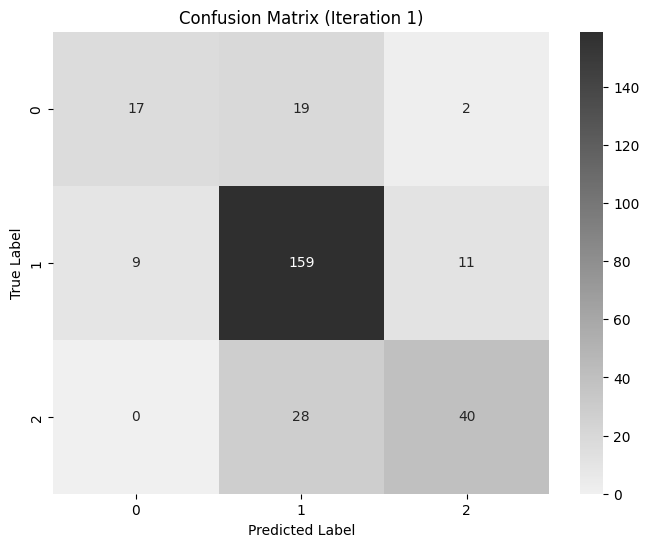



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9543859649122807
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



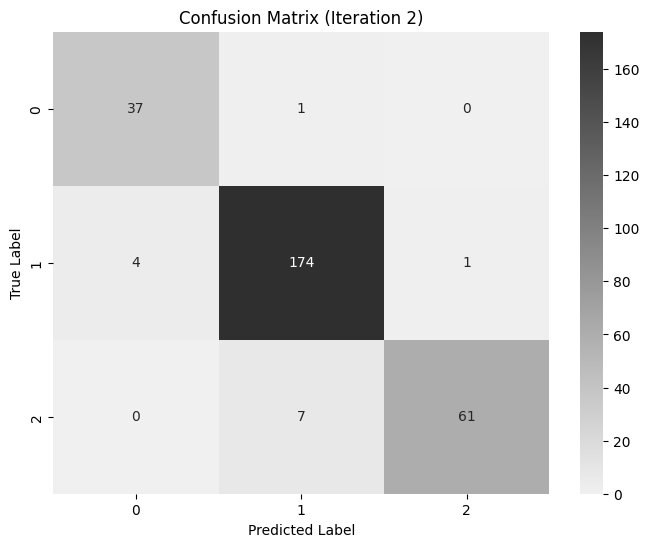

In [193]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

In [194]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = chi2_selector.transform([[harga, fasilitas]])
    input_data = scaler.transform(input_data)

    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga mahal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Penerapan Chi-square setelah resampling

In [195]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [196]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X_resampled, y_resampled)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 163455976.05666184, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 20.90801186943577, p-value: 2.8832540369231292e-05


In [197]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [198]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [199]:
k_features_range = range(1, X_resampled.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7218934911242604
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.72      0.61      0.66       184
           2       0.76      0.69      0.72       157

    accuracy                           0.72       507
   macro avg       0.72      0.73      0.72       507
weighted avg       0.72      0.72      0.72       507



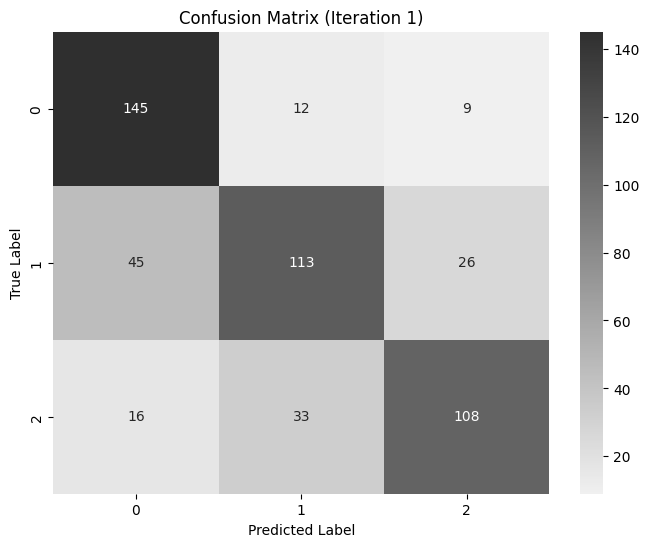



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9644970414201184
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.97      0.96       157

    accuracy                           0.96       507
   macro avg       0.97      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



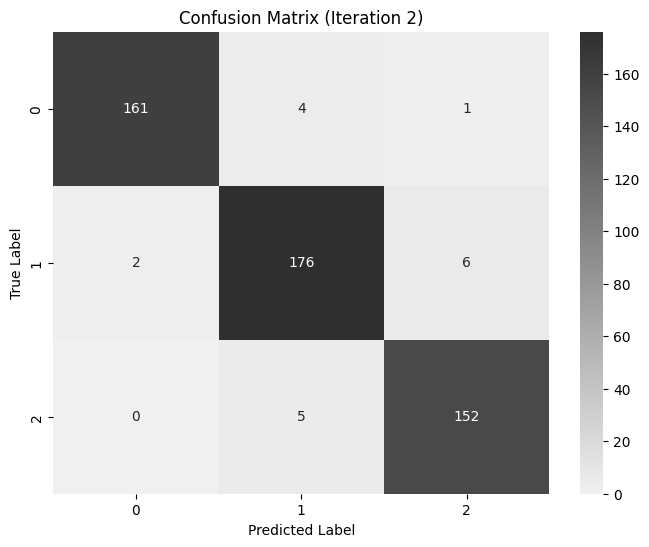

In [200]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X_resampled.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

In [201]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = chi2_selector.transform([[harga, fasilitas]])
    input_data = scaler.transform(input_data)

    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga mahal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Penerapan SFS-Forward Sebelum Resampling

In [202]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [204]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7579
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.89      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.67       285
weighted avg       0.75      0.76      0.75       285



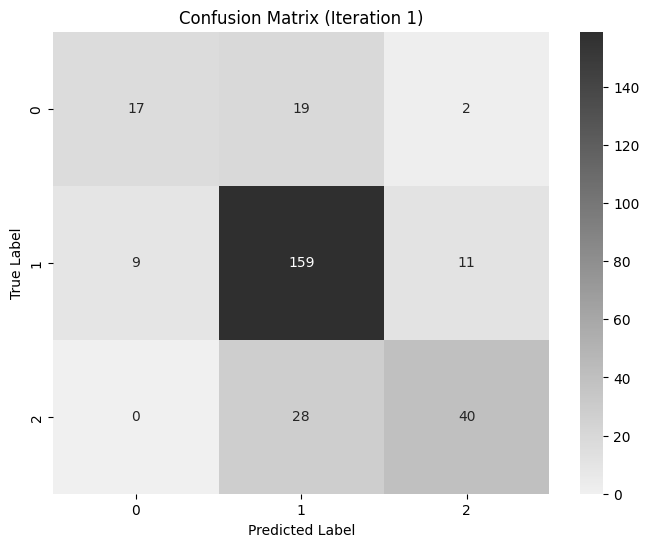



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



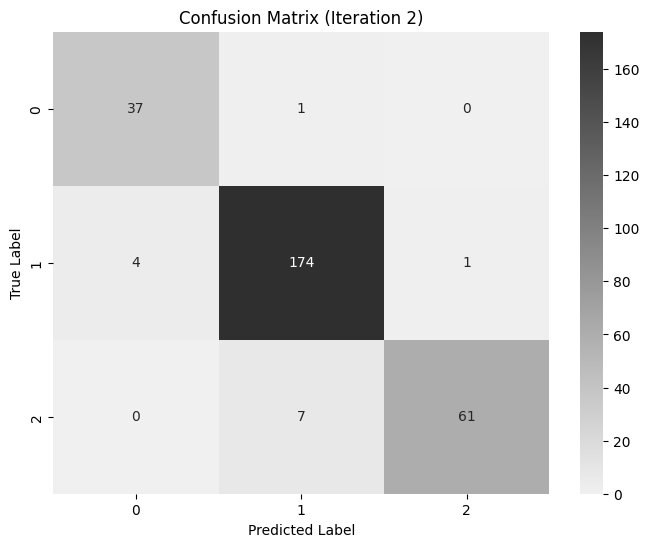

In [205]:
# Perform SFS with forward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)

for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=True,  # Forward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

Penerapan SFS-Forward Setelah Resampling

In [206]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [207]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [208]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [209]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7219
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.72      0.61      0.66       184
           2       0.76      0.69      0.72       157

    accuracy                           0.72       507
   macro avg       0.72      0.73      0.72       507
weighted avg       0.72      0.72      0.72       507





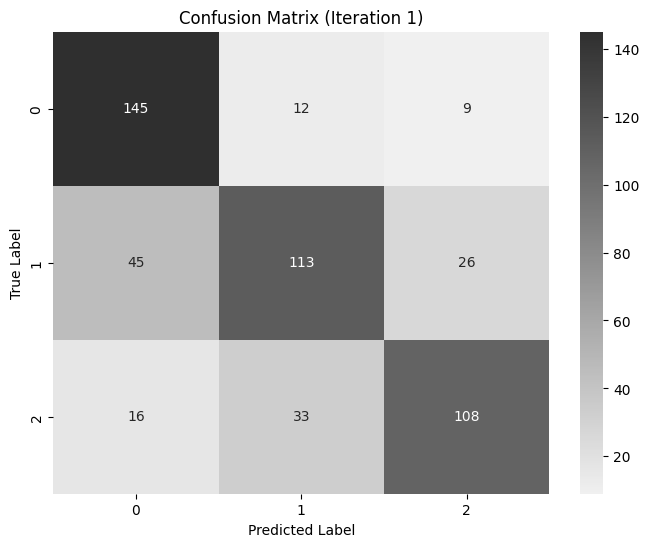



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9645
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.97      0.96       157

    accuracy                           0.96       507
   macro avg       0.97      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507





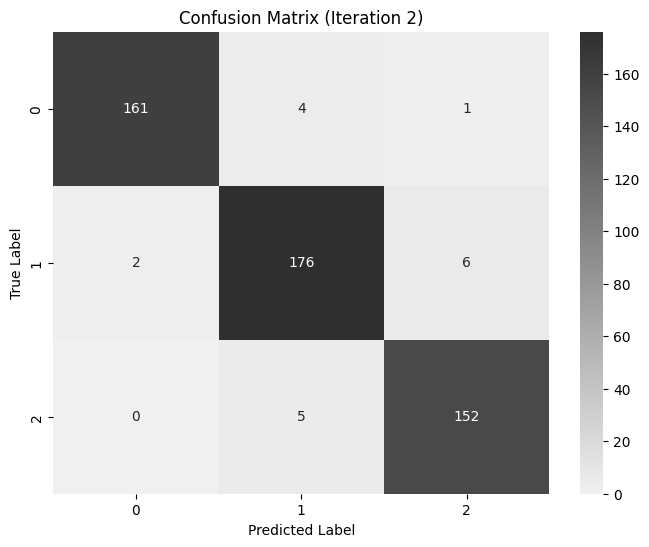

In [210]:
# Perform SFS with backward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



penerapan sfs-backward sebelum resampling

In [211]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [212]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [213]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [214]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7579
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.89      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.67       285
weighted avg       0.75      0.76      0.75       285





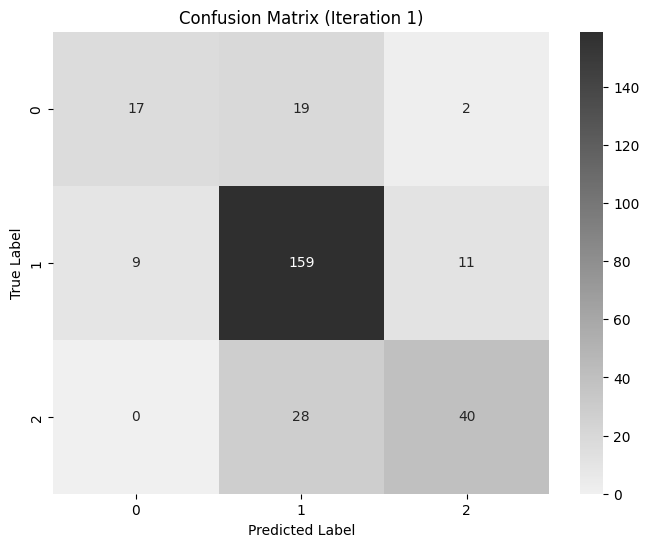



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285





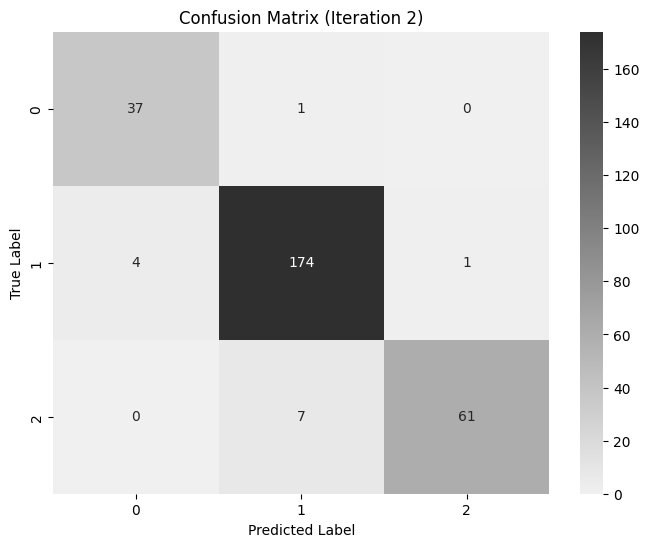

In [215]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



penerapan sfs-backward setelah resampling

In [216]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [217]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [218]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [219]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [220]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7219
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.72      0.61      0.66       184
           2       0.76      0.69      0.72       157

    accuracy                           0.72       507
   macro avg       0.72      0.73      0.72       507
weighted avg       0.72      0.72      0.72       507





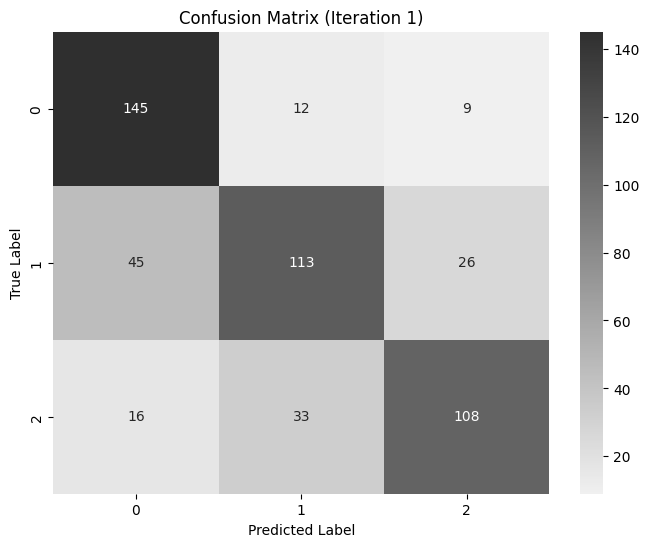



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9645
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.97      0.96       157

    accuracy                           0.96       507
   macro avg       0.97      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507





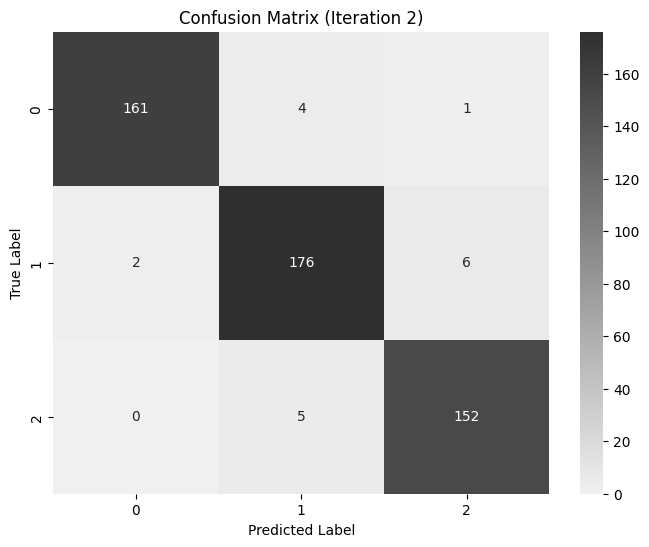

In [221]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>Decission Tree<h2>

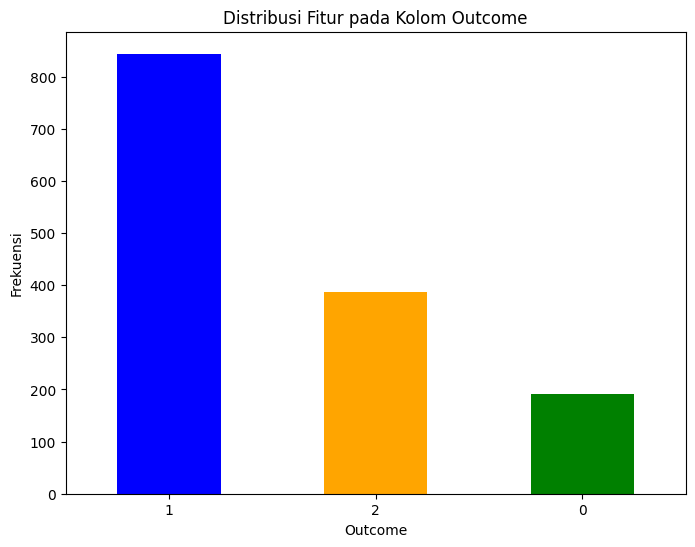

In [222]:
# Menampilkan diagram batang distribusi fitur pada kolom 'outcome'
# outcome_counts = data['Outcome'].value_counts()
outcome_counts = y.value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [223]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [224]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [225]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [226]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



In [228]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9543859649122807


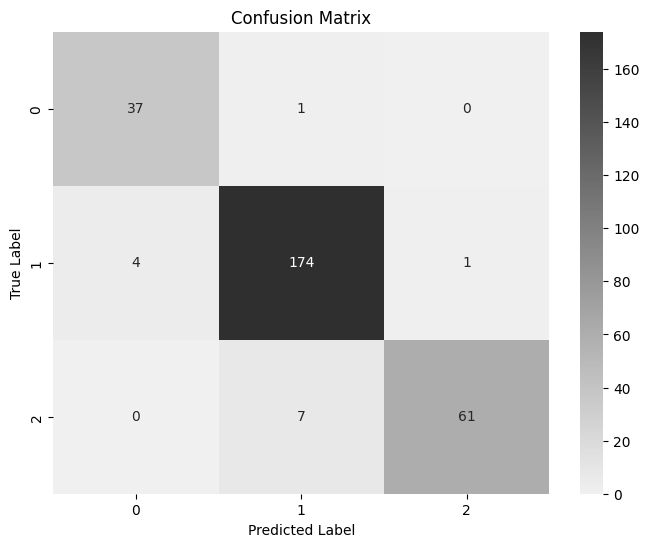

In [229]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_decissionTree.png')

# Menampilkan plot
plt.show()

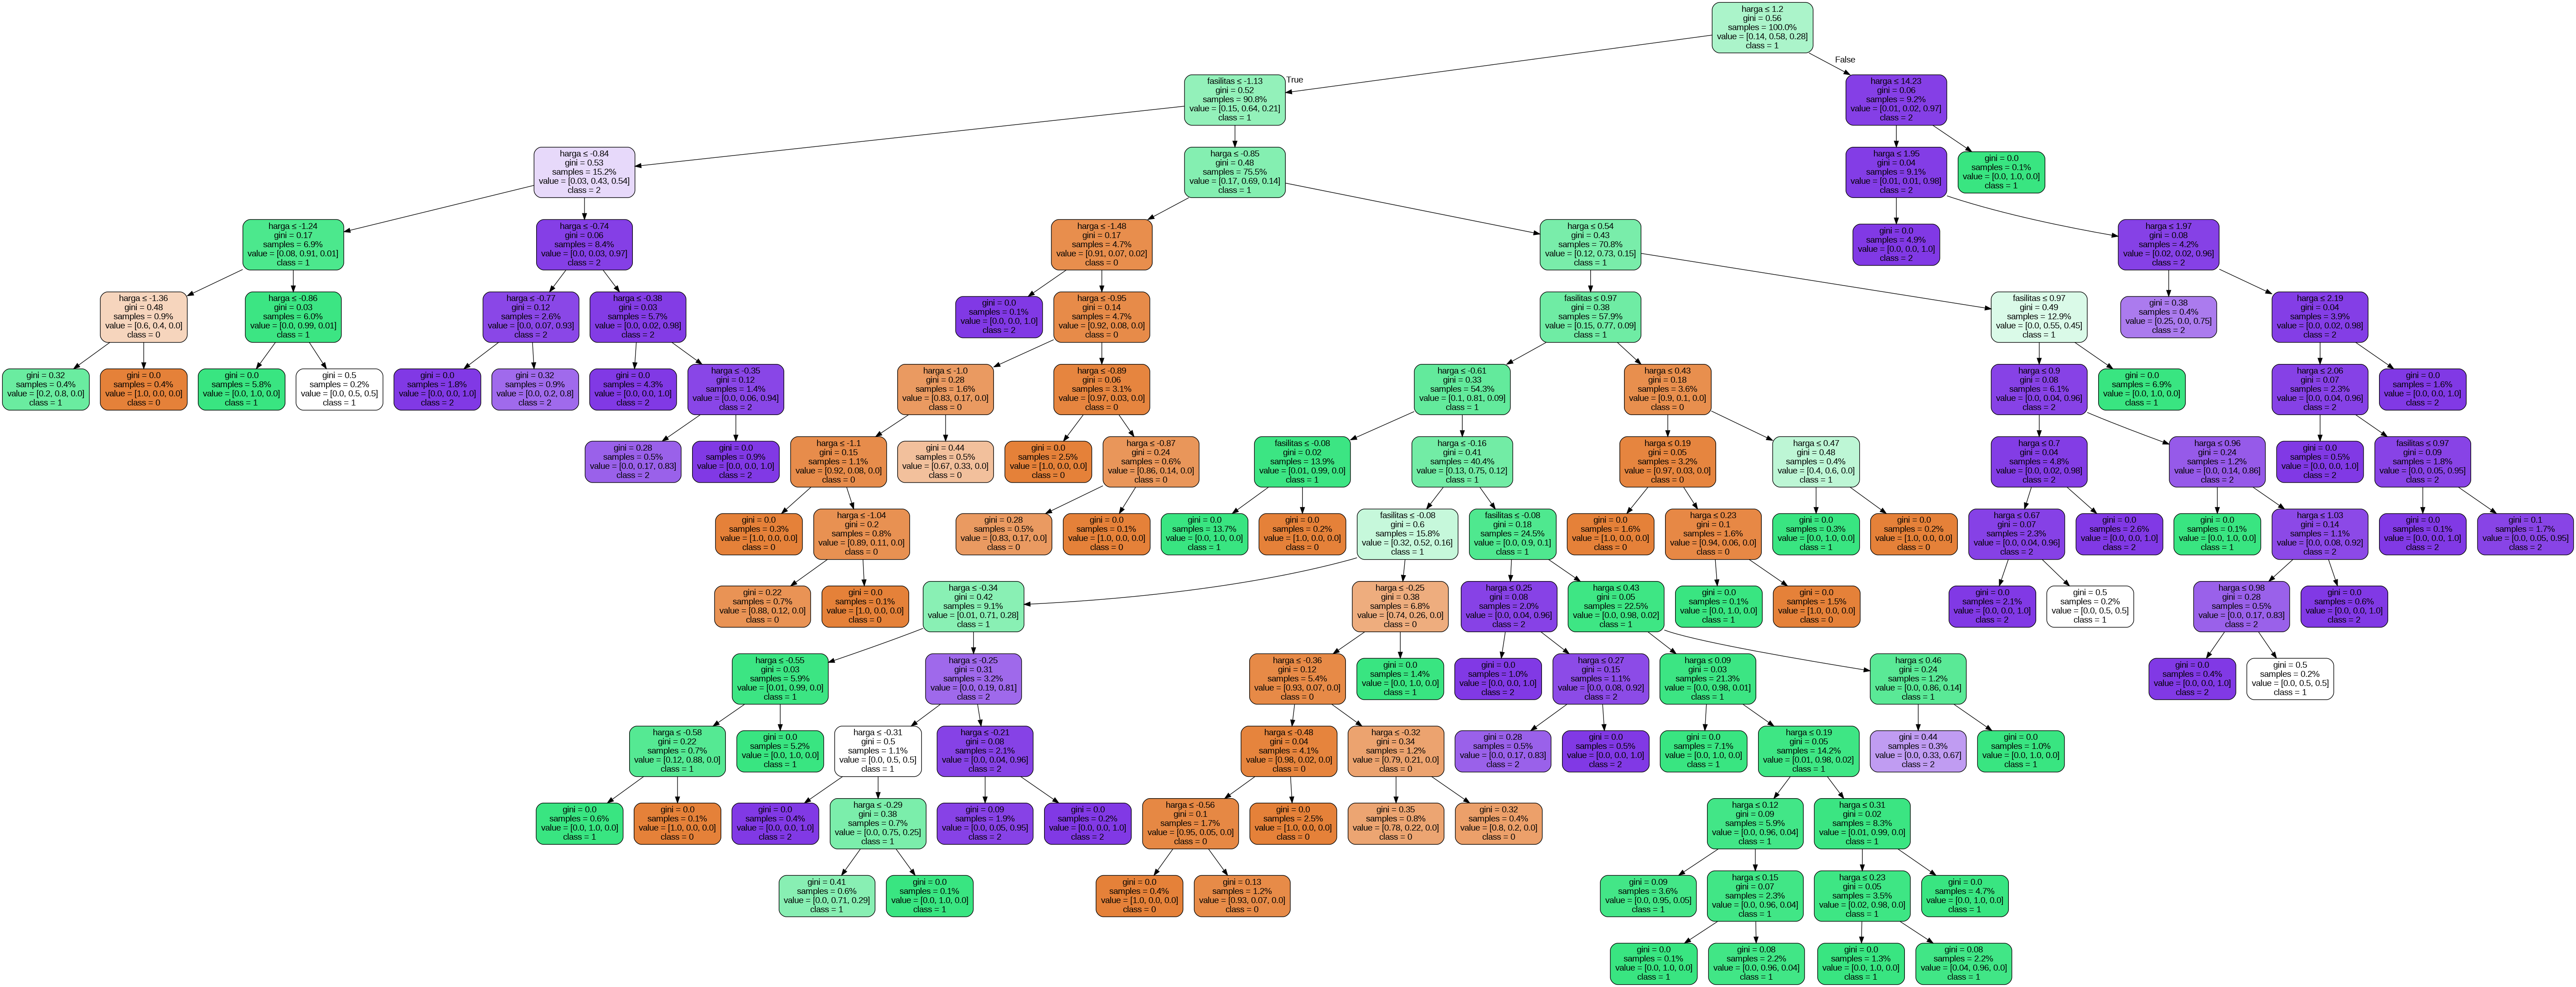

In [230]:
# Visualisasi Decision Tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=['harga', 'fasilitas'],
    class_names=['0', '1', '2'],  # Sesuaikan dengan kelas yang ada di data Anda
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,  # Menyesuaikan ukuran node sesuai proporsi
    precision=2  # Mengurangi desimal untuk memadatkan tampilan
)

#  Mengedit file DOT untuk mengatur ukuran font
dot_data = dot_data.replace('helvetica', 'Arial')
dot_data = dot_data.replace('fontsize=14', 'fontsize=10')  # Mengatur ukuran font lebih kecil

# Render dan simpan gambar
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree_visualization', cleanup=True)

# Menampilkan gambar
img_path = 'decision_tree_visualization.png'
display(Image(filename=img_path))

<h2>Data Setelah Resampling<h2>

In [231]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

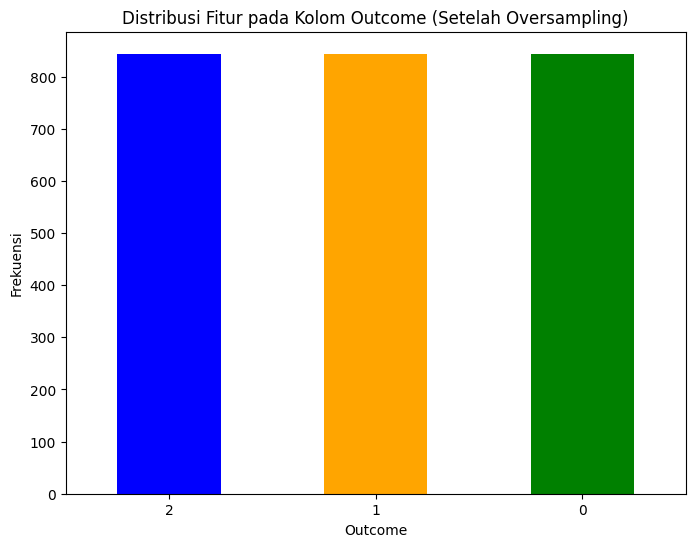

In [232]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome (Setelah Oversampling)')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [233]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [234]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [15]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.96      0.96       157

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



In [18]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9625246548323472


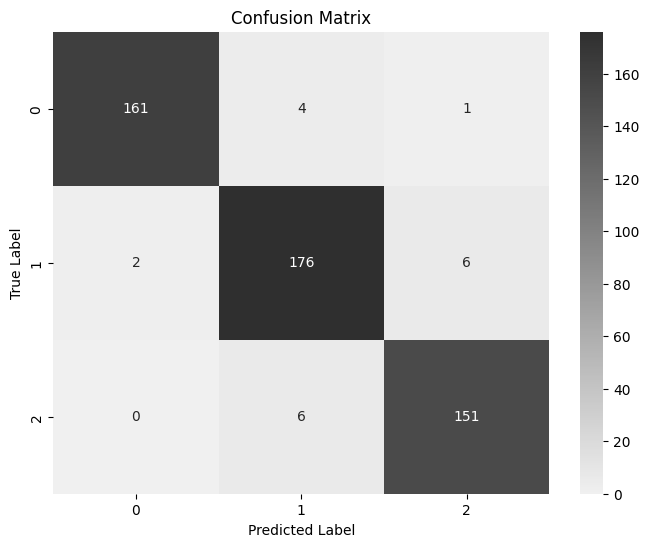

In [19]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_decissionTree.png')

# Menampilkan plot
plt.show()

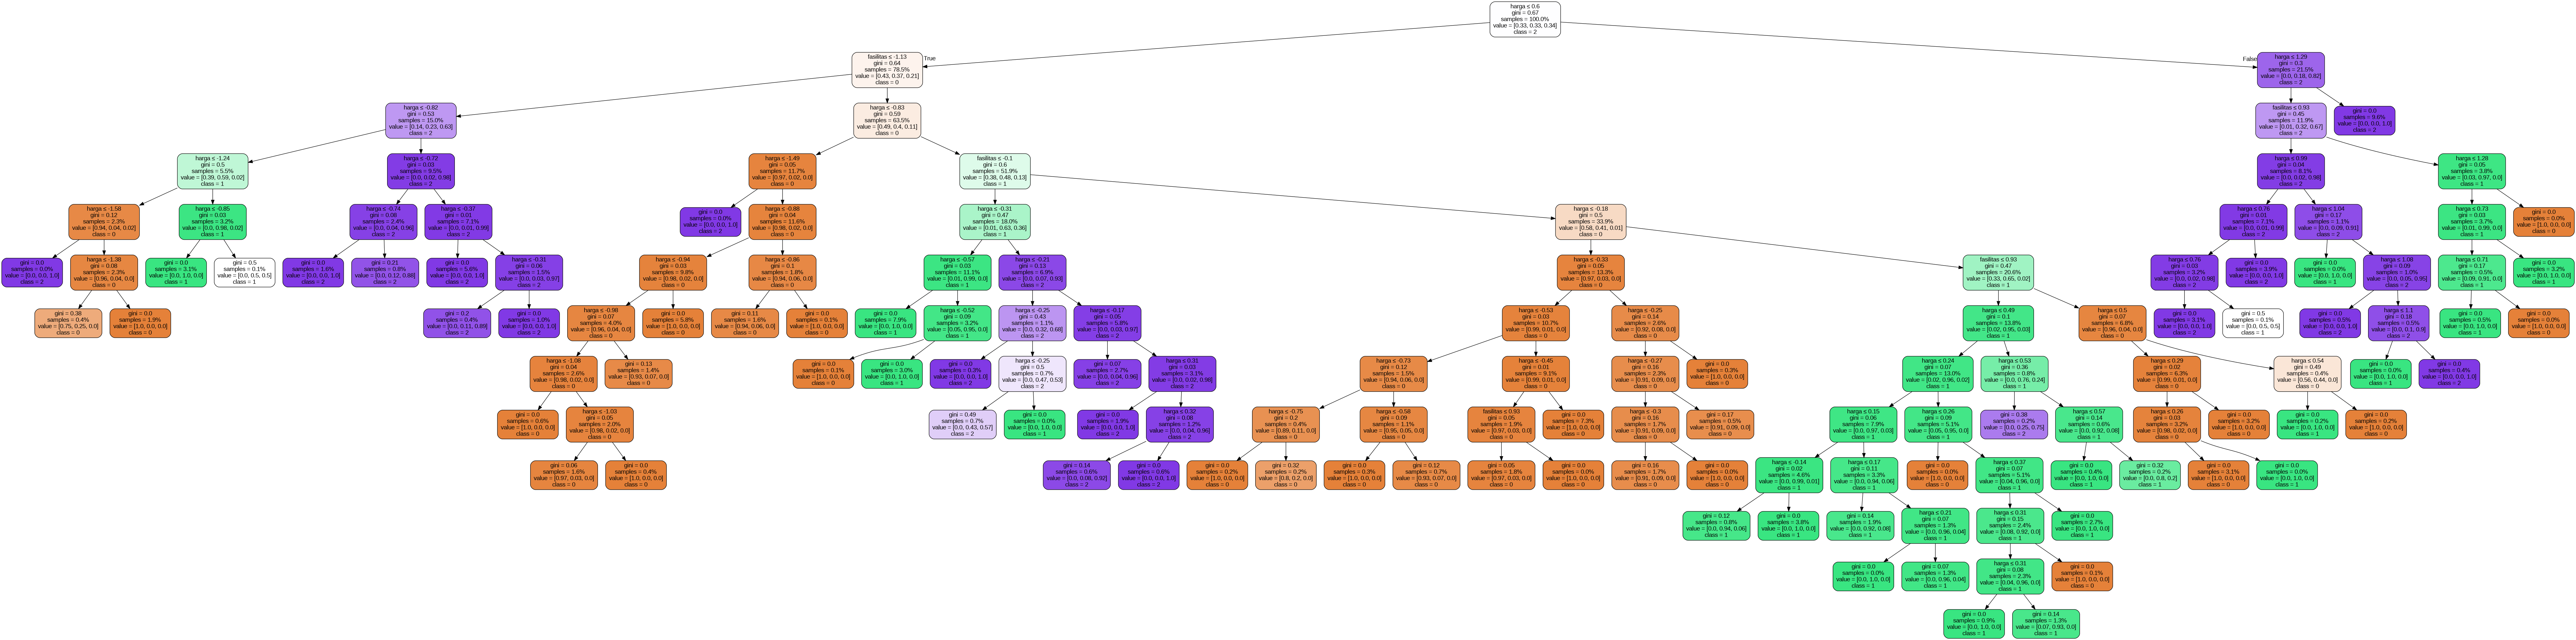

In [240]:
# Visualisasi Decision Tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=['harga', 'fasilitas'],
    class_names=['0', '1', '2'],  # Sesuaikan dengan kelas yang ada di data Anda
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,  # Menyesuaikan ukuran node sesuai proporsi
    precision=2  # Mengurangi desimal untuk memadatkan tampilan
)

#  Mengedit file DOT untuk mengatur ukuran font
dot_data = dot_data.replace('helvetica', 'Arial')
dot_data = dot_data.replace('fontsize=14', 'fontsize=10')  # Mengatur ukuran font lebih kecil

# Render dan simpan gambar
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree_visualization', cleanup=True)

# Menampilkan gambar
img_path = 'decision_tree_visualization.png'
display(Image(filename=img_path))

<h2>Penerapan Chi-square sebelum resampling<h2>

In [241]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X, y)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 65213284.94208518, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 8.339473319272175, p-value: 0.015456329863553666


In [242]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [244]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7543859649122807
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        38
           1       0.77      0.88      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.75       285
   macro avg       0.71      0.64      0.67       285
weighted avg       0.75      0.75      0.74       285



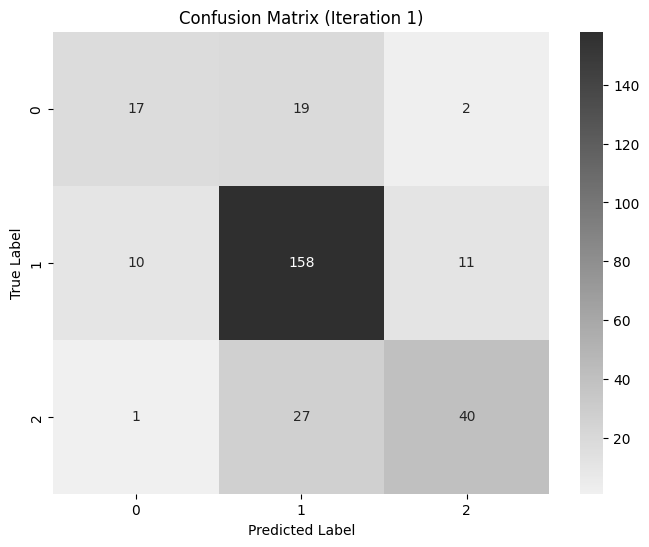



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9543859649122807
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



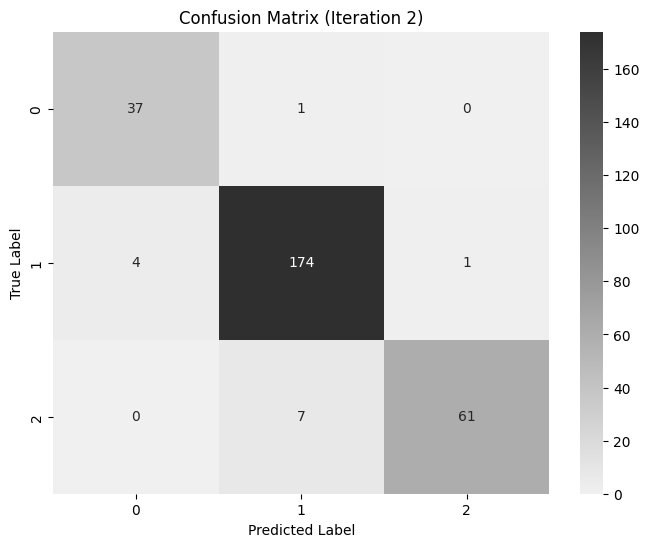

In [245]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan Chi-square setelah resampling<h2>

In [246]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [247]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X_resampled, y_resampled)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 163455976.05666184, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 20.90801186943577, p-value: 2.8832540369231292e-05


In [248]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [249]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [250]:
k_features_range = range(1, X_resampled.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7159763313609467
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.70      0.61      0.65       184
           2       0.76      0.67      0.71       157

    accuracy                           0.72       507
   macro avg       0.72      0.72      0.71       507
weighted avg       0.72      0.72      0.71       507



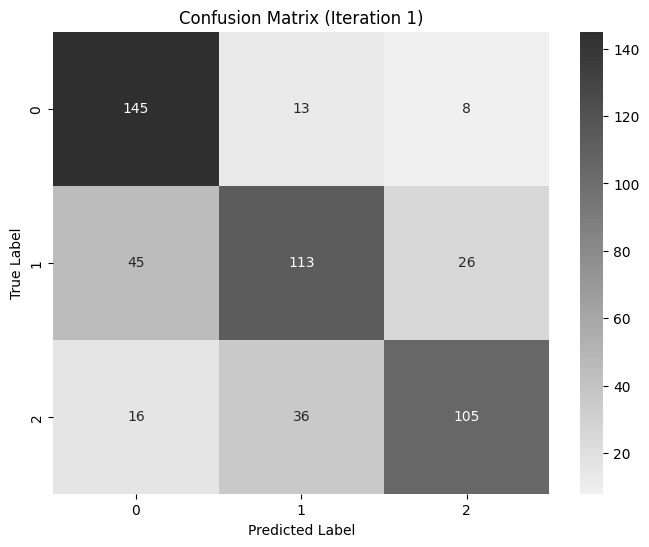



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9625246548323472
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.96      0.96       157

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



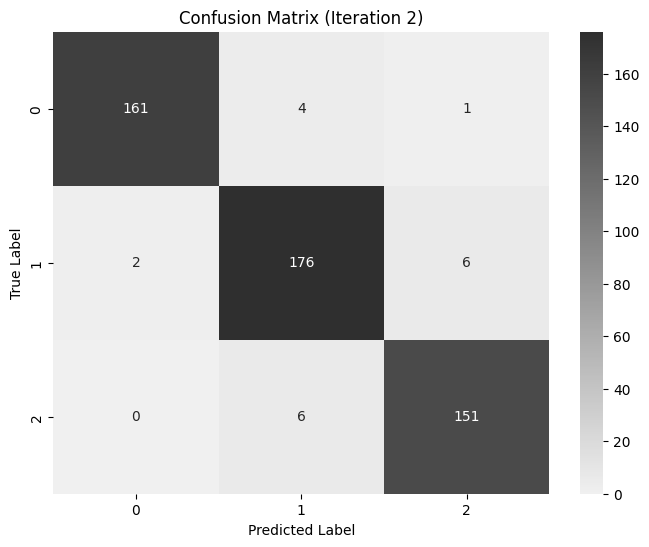

In [251]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X_resampled.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Sebelum Resampling <h2>

In [252]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [253]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [254]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7544
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        38
           1       0.77      0.88      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.75       285
   macro avg       0.71      0.64      0.67       285
weighted avg       0.75      0.75      0.74       285



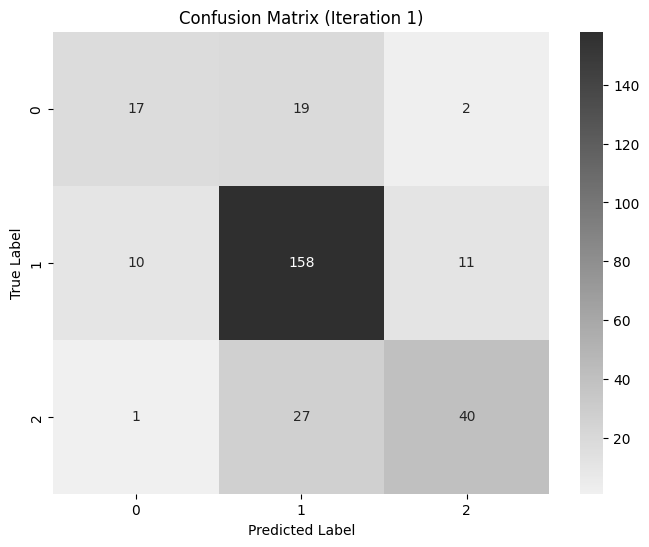



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



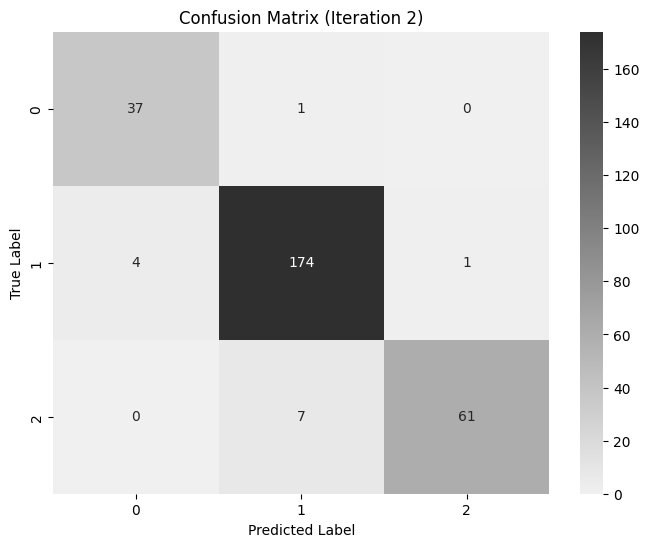

In [255]:
# Perform SFS with forward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)

for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=True,  # Forward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Setelah Resampling <h2>

In [256]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [257]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [258]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [259]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7160
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.70      0.61      0.65       184
           2       0.76      0.67      0.71       157

    accuracy                           0.72       507
   macro avg       0.72      0.72      0.71       507
weighted avg       0.72      0.72      0.71       507





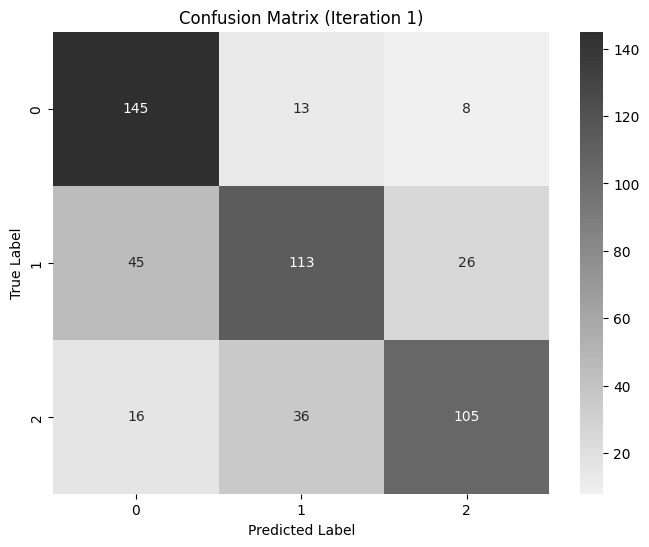



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.96      0.96       157

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507





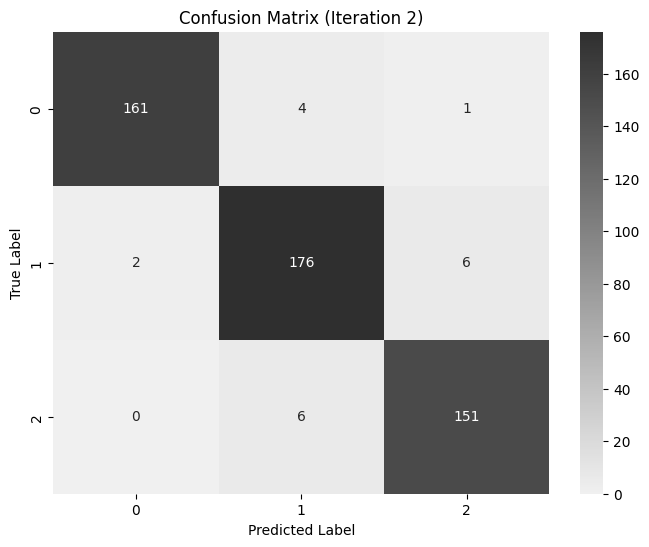

In [260]:
# Perform SFS with backward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward sebelum resampling<h2>

In [261]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [262]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [263]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [264]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7544
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        38
           1       0.77      0.88      0.83       179
           2       0.75      0.59      0.66        68

    accuracy                           0.75       285
   macro avg       0.71      0.64      0.67       285
weighted avg       0.75      0.75      0.74       285





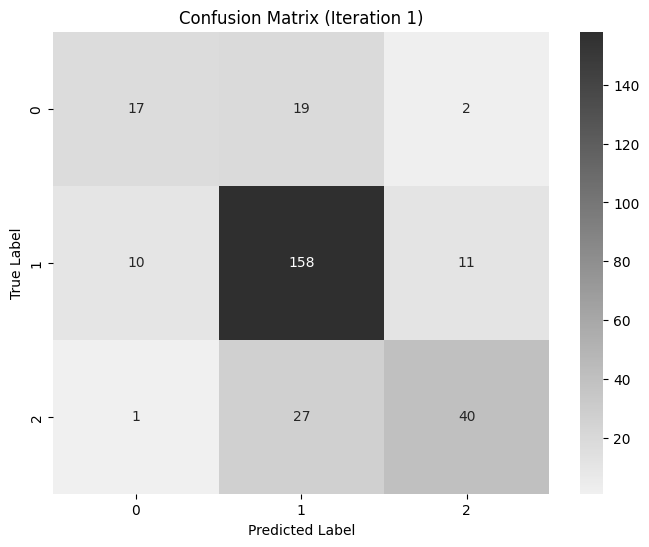



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285





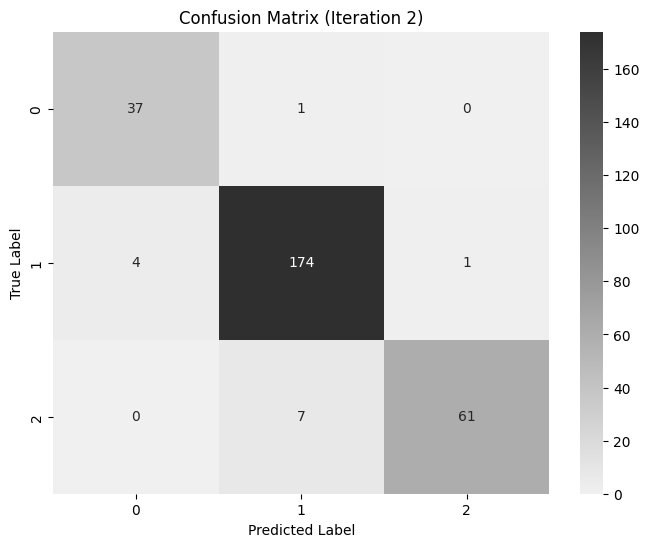

In [265]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward setelah resampling<h2>

In [266]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [267]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [268]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [269]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [270]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7160
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.70      0.61      0.65       184
           2       0.76      0.67      0.71       157

    accuracy                           0.72       507
   macro avg       0.72      0.72      0.71       507
weighted avg       0.72      0.72      0.71       507





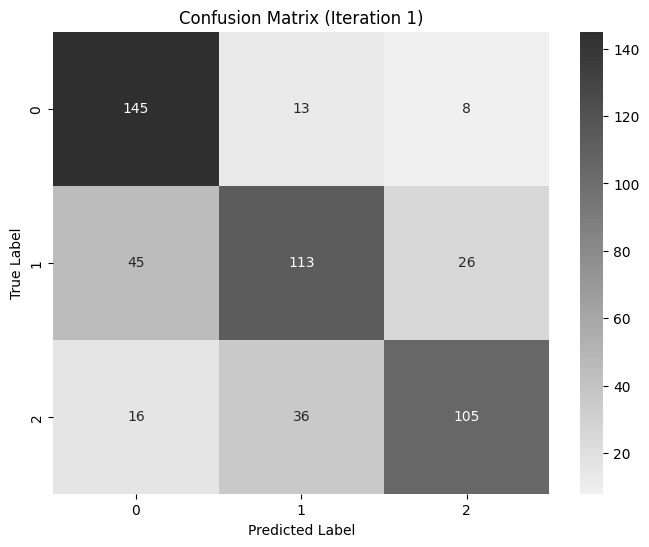



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.95      0.96      0.95       184
           2       0.96      0.96      0.96       157

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507





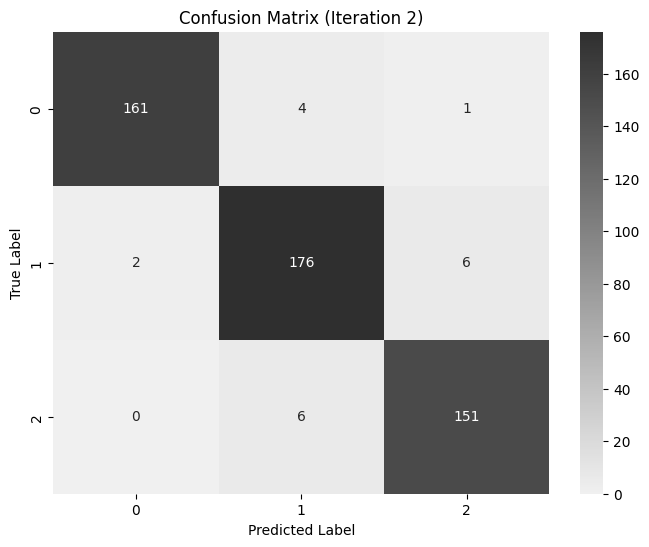

In [271]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>Logistic Regression

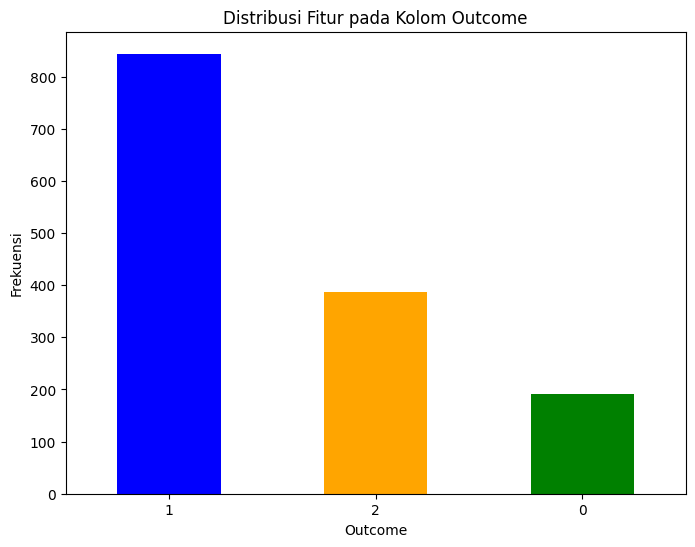

In [272]:
# Menampilkan diagram batang distribusi fitur pada kolom 'outcome'
# outcome_counts = data['Outcome'].value_counts()
outcome_counts = y.value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [273]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [274]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [275]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [276]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.85      0.98      0.91       179
           2       1.00      0.71      0.83        68

    accuracy                           0.87       285
   macro avg       0.90      0.78      0.83       285
weighted avg       0.88      0.87      0.87       285



In [278]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8736842105263158


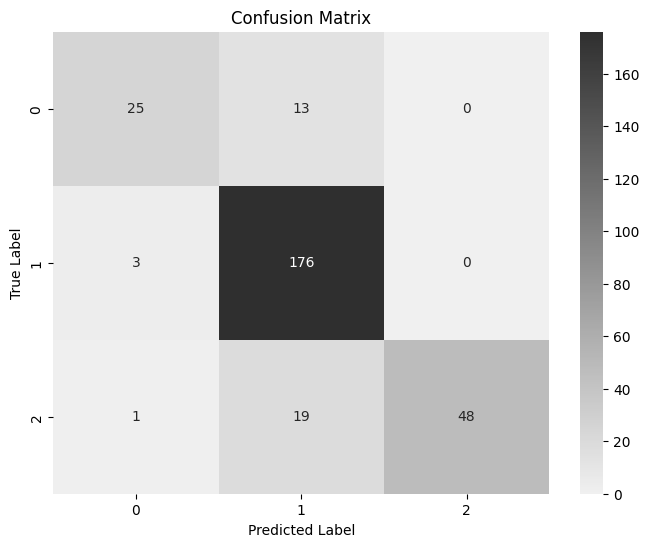

In [279]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_LogisticRegression.png')

# Menampilkan plot
plt.show()

In [280]:
# Menampilkan koefisien model
coefficients = pd.DataFrame(model.coef_, columns=['harga', 'fasilitas'])
coefficients['class'] = ['0', '1', '2']
print(coefficients)

      harga  fasilitas class
0 -6.312072   4.121331     0
1  0.739667  -0.365734     1
2  5.572405  -3.755598     2


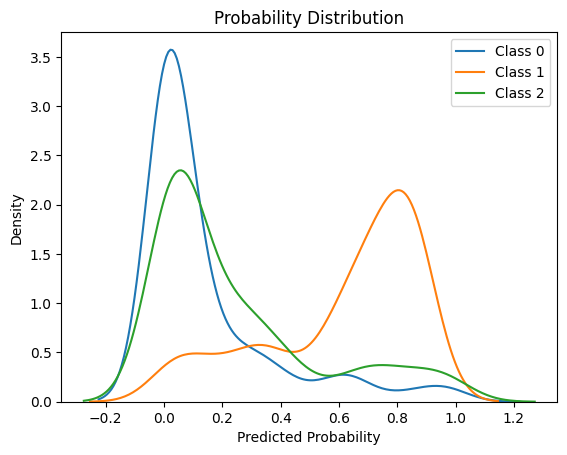

In [281]:
# Probability distribution
y_prob = model.predict_proba(X_test)
for i in range(y_prob.shape[1]):
    sns.kdeplot(y_prob[:, i], label=f'Class {i}')
plt.title('Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

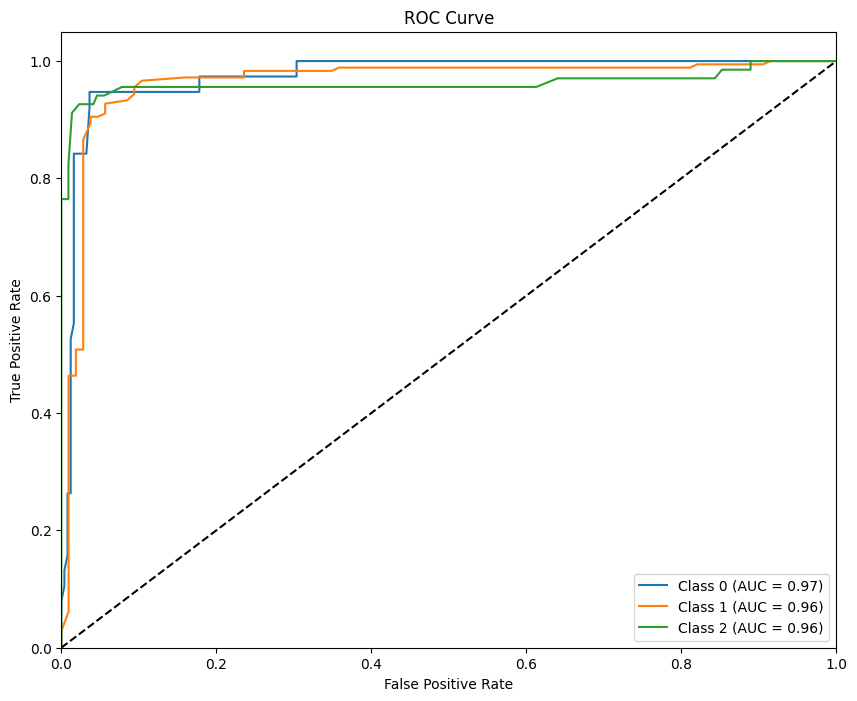

In [282]:
# ROC Curve
plt.figure(figsize=(10, 8))
for i in range(model.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Data Resample<h>

In [283]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

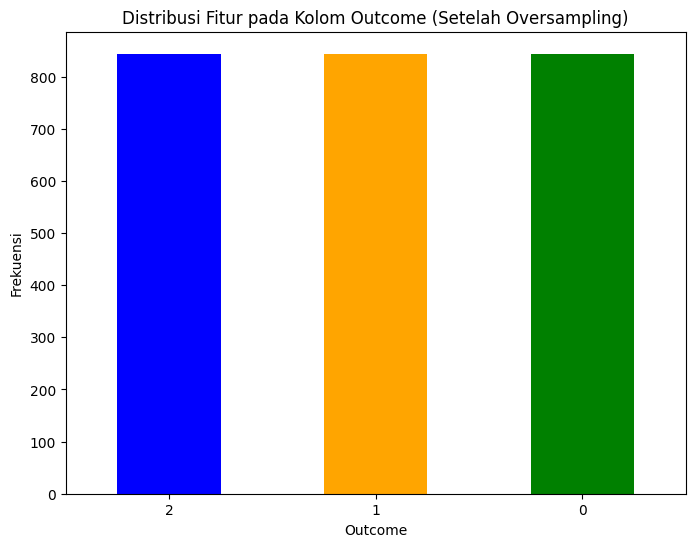

In [284]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome (Setelah Oversampling)')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [285]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [286]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [21]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       166
           1       0.90      0.89      0.89       184
           2       0.95      0.96      0.95       157

    accuracy                           0.92       507
   macro avg       0.92      0.92      0.92       507
weighted avg       0.92      0.92      0.92       507



In [23]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9191321499013807


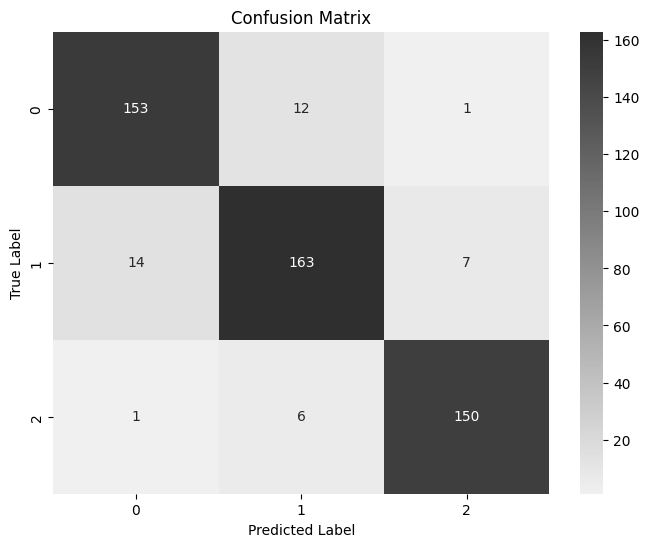

In [24]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_LogisticRegression.png')

# Menampilkan plot
plt.show()

In [292]:
# Menampilkan koefisien model
coefficients = pd.DataFrame(model.coef_, columns=['harga', 'fasilitas'])
coefficients['class'] = ['0', '1', '2']
print(coefficients)

      harga  fasilitas class
0 -8.358723   5.456502     0
1  0.111584   0.203705     1
2  8.247139  -5.660208     2


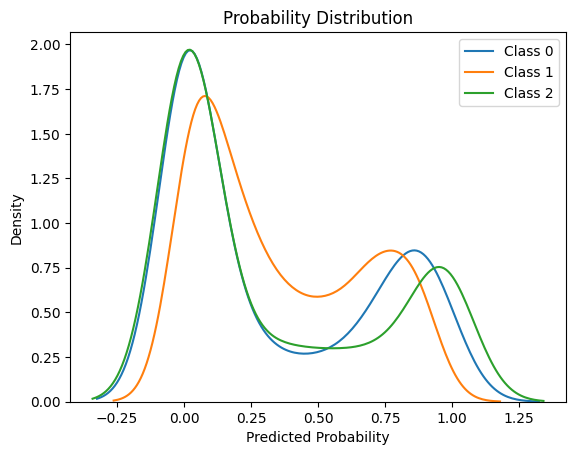

In [293]:
# Probability distribution
y_prob = model.predict_proba(X_test)
for i in range(y_prob.shape[1]):
    sns.kdeplot(y_prob[:, i], label=f'Class {i}')
plt.title('Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

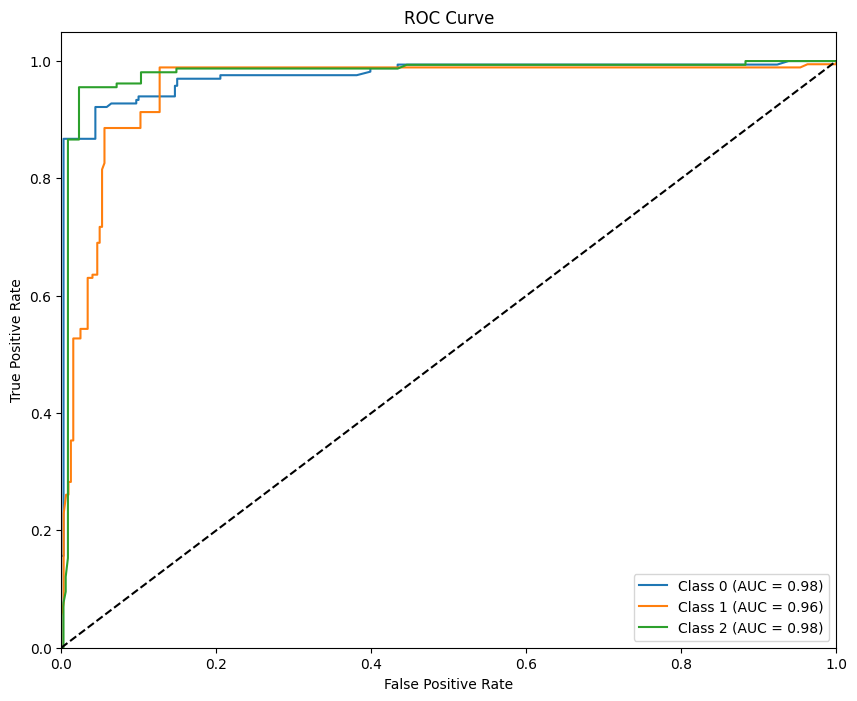

In [294]:
# ROC Curve
plt.figure(figsize=(10, 8))
for i in range(model.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Penerapan Chi-square sebelum resampling<h2>

In [295]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X, y)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 65213284.94208518, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 8.339473319272175, p-value: 0.015456329863553666


In [296]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
model = LogisticRegression(random_state=42, max_iter=200)


In [298]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6280701754385964
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.63      1.00      0.77       179
           2       0.00      0.00      0.00        68

    accuracy                           0.63       285
   macro avg       0.21      0.33      0.26       285
weighted avg       0.39      0.63      0.48       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


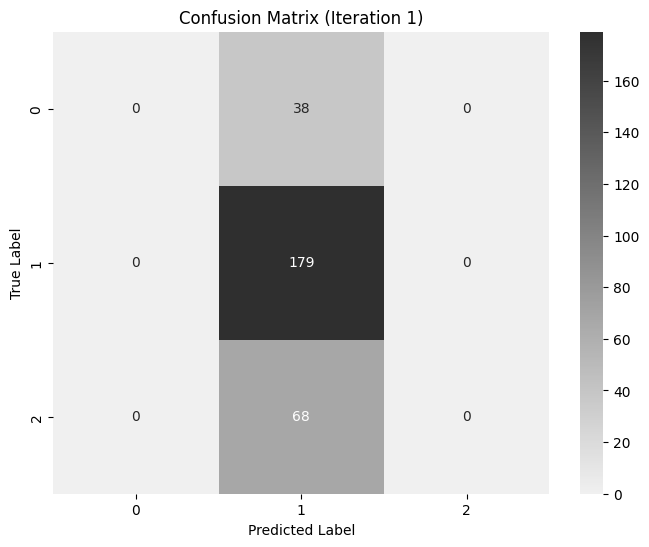



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.6280701754385964
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.63      1.00      0.77       179
           2       0.00      0.00      0.00        68

    accuracy                           0.63       285
   macro avg       0.21      0.33      0.26       285
weighted avg       0.39      0.63      0.48       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


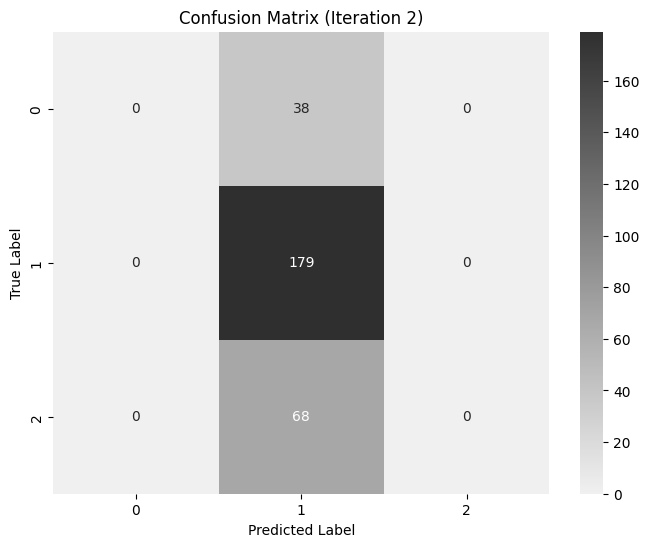

In [299]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan Chi-square setelah resampling<h2>

In [300]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [301]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X_resampled, y_resampled)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 163455976.05666184, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 20.90801186943577, p-value: 2.8832540369231292e-05


In [302]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [303]:
model = LogisticRegression(random_state=42, max_iter=200)
# model.fit(X_train, y_train)

In [304]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.3096646942800789
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.00      0.00      0.00       184
           2       0.31      1.00      0.47       157

    accuracy                           0.31       507
   macro avg       0.10      0.33      0.16       507
weighted avg       0.10      0.31      0.15       507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


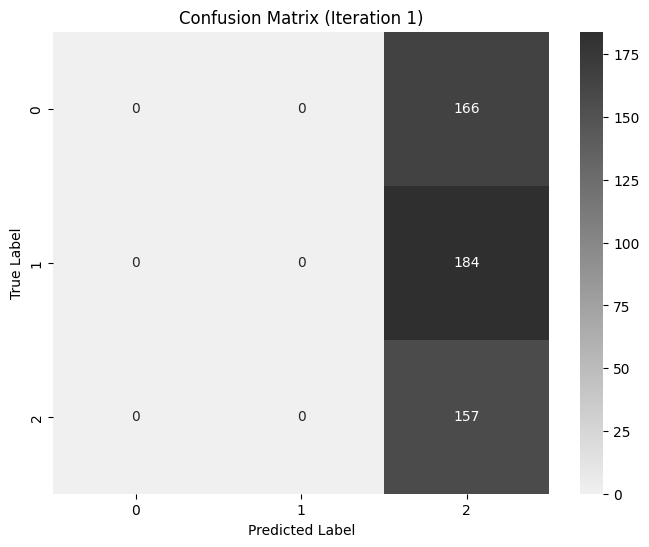



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.3096646942800789
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.00      0.00      0.00       184
           2       0.31      1.00      0.47       157

    accuracy                           0.31       507
   macro avg       0.10      0.33      0.16       507
weighted avg       0.10      0.31      0.15       507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


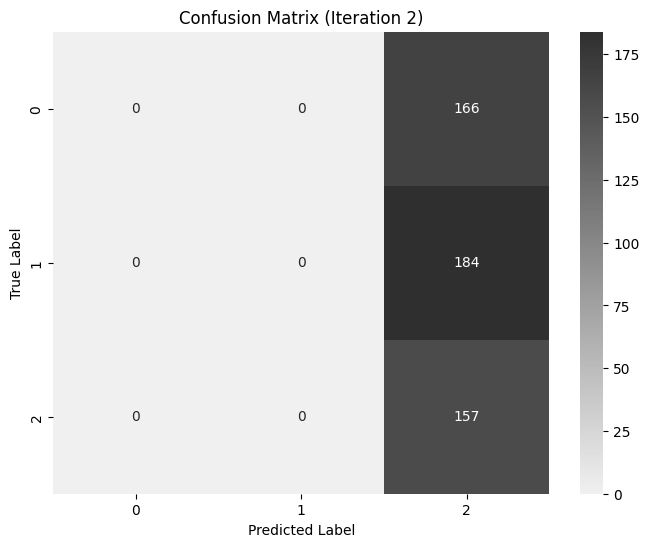

In [305]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Sebelum Resampling <h2>

In [306]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [307]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [308]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6561
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      0.95      0.78       179
           2       0.65      0.25      0.36        68

    accuracy                           0.66       285
   macro avg       0.44      0.40      0.38       285
weighted avg       0.57      0.66      0.57       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


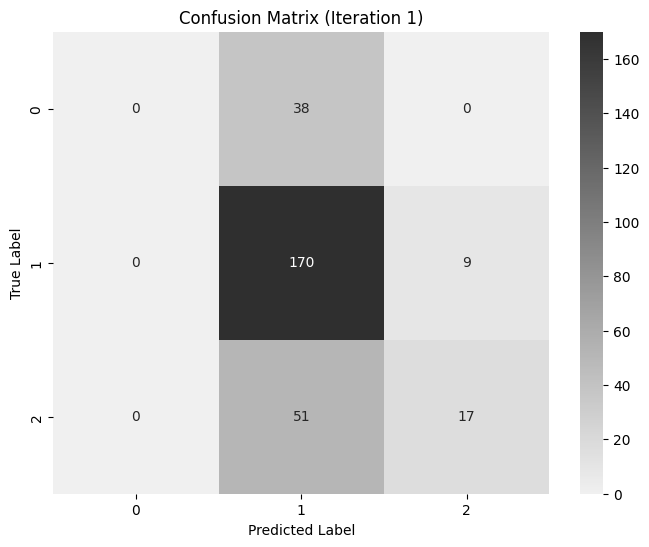



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.8737
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.85      0.98      0.91       179
           2       1.00      0.71      0.83        68

    accuracy                           0.87       285
   macro avg       0.90      0.78      0.83       285
weighted avg       0.88      0.87      0.87       285



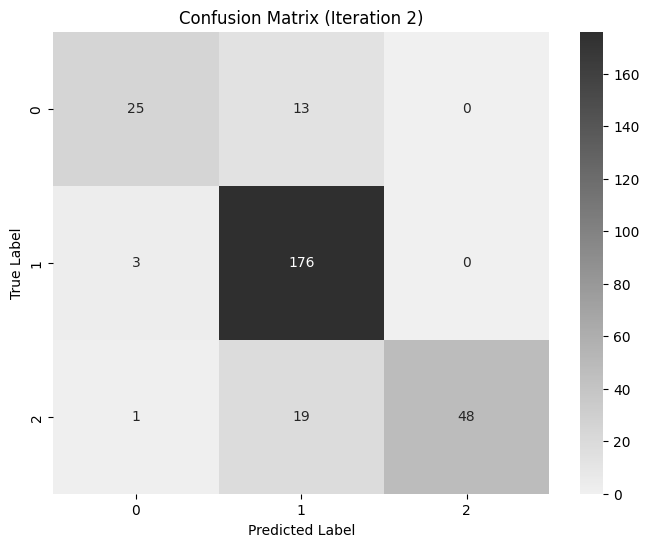

In [309]:
# Perform SFS with forward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)

for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=True,  # Forward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Setelah Resampling <h2>

In [310]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [311]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [312]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [313]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.5089
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.78      0.62       166
           1       0.49      0.24      0.33       184
           2       0.51      0.53      0.52       157

    accuracy                           0.51       507
   macro avg       0.51      0.52      0.49       507
weighted avg       0.50      0.51      0.48       507





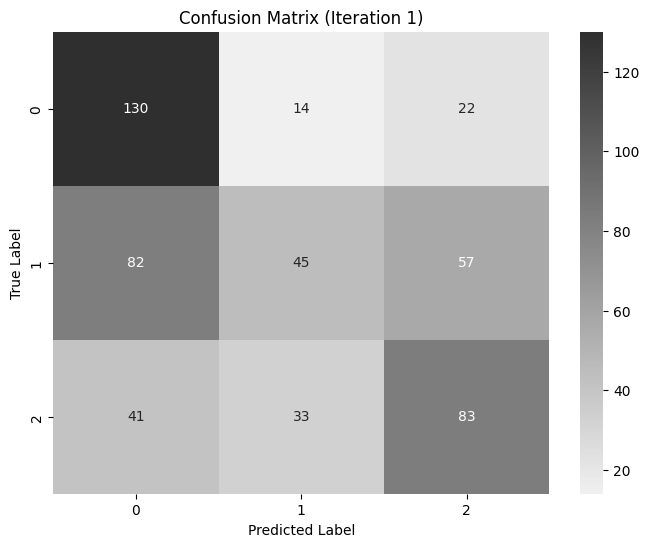



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9191
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       166
           1       0.90      0.89      0.89       184
           2       0.95      0.96      0.95       157

    accuracy                           0.92       507
   macro avg       0.92      0.92      0.92       507
weighted avg       0.92      0.92      0.92       507





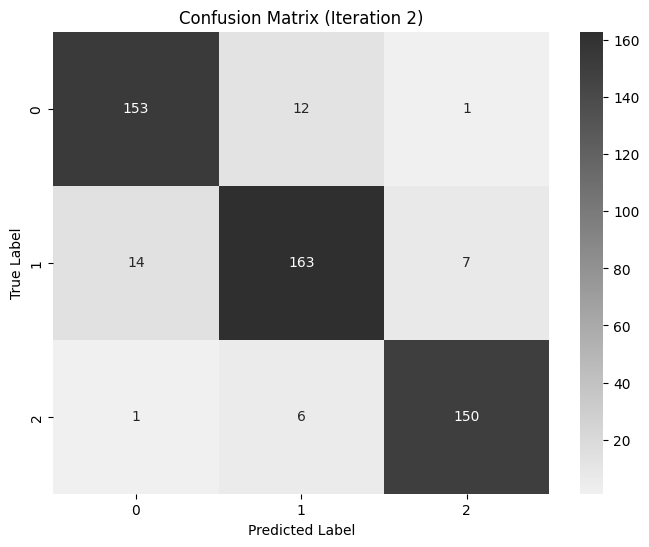

In [314]:
# Perform SFS with backward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward sebelum resampling<h2>

In [315]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [316]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [317]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [318]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6561
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      0.95      0.78       179
           2       0.65      0.25      0.36        68

    accuracy                           0.66       285
   macro avg       0.44      0.40      0.38       285
weighted avg       0.57      0.66      0.57       285





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


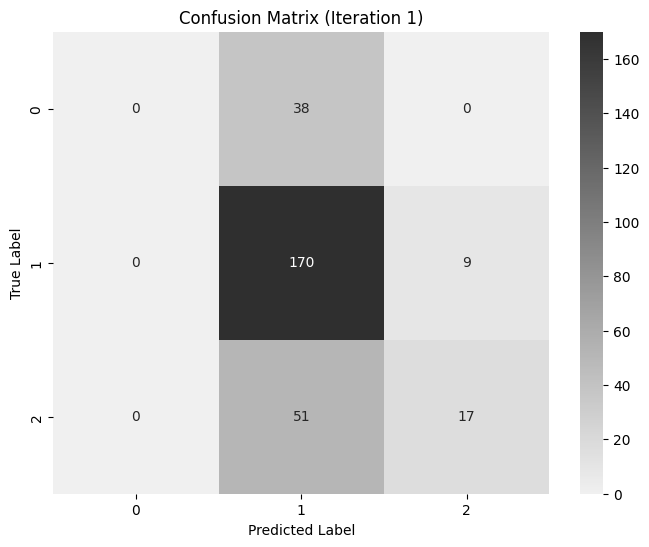



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.8737
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.85      0.98      0.91       179
           2       1.00      0.71      0.83        68

    accuracy                           0.87       285
   macro avg       0.90      0.78      0.83       285
weighted avg       0.88      0.87      0.87       285





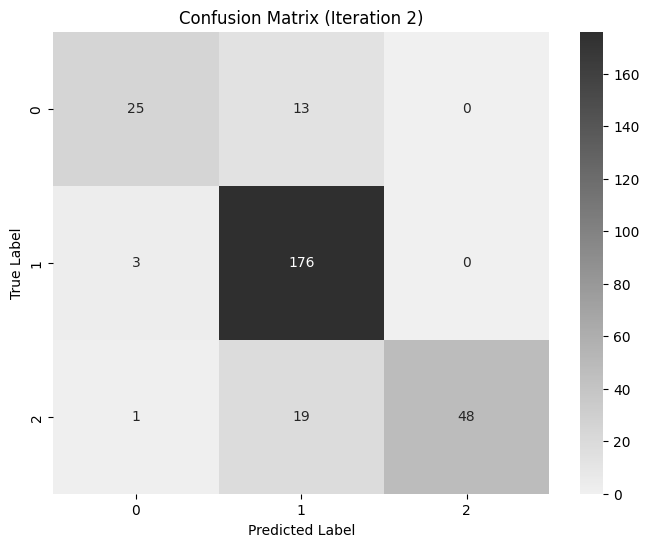

In [319]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward setelah resampling<h2>

In [320]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [321]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [322]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [323]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [324]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.5089
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.78      0.62       166
           1       0.49      0.24      0.33       184
           2       0.51      0.53      0.52       157

    accuracy                           0.51       507
   macro avg       0.51      0.52      0.49       507
weighted avg       0.50      0.51      0.48       507





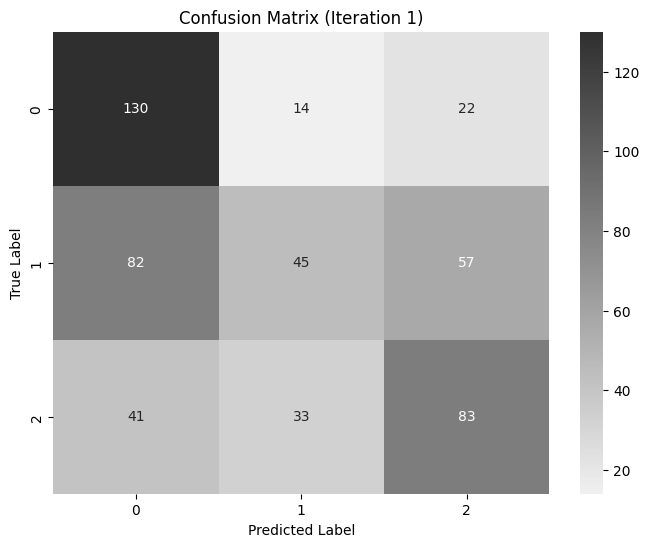



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9191
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       166
           1       0.90      0.89      0.89       184
           2       0.95      0.96      0.95       157

    accuracy                           0.92       507
   macro avg       0.92      0.92      0.92       507
weighted avg       0.92      0.92      0.92       507





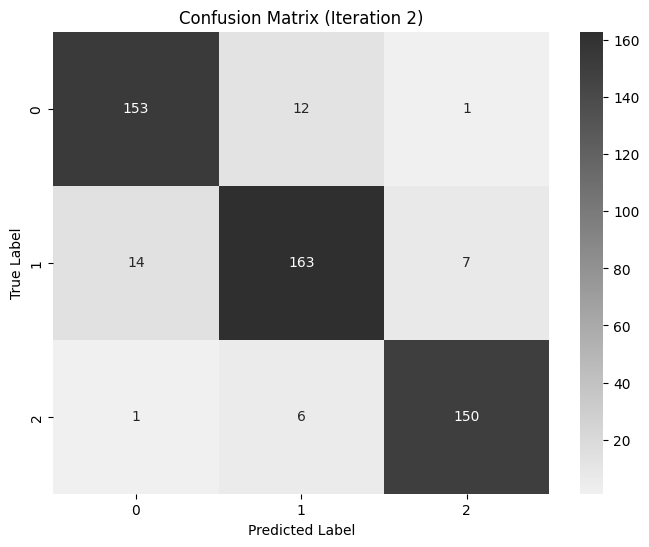

In [325]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>Naive Bayes

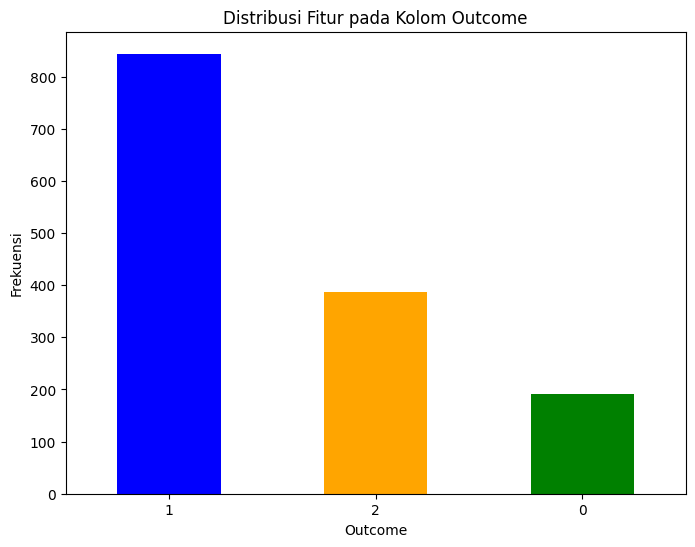

In [326]:
# Menampilkan diagram batang distribusi fitur pada kolom 'outcome'
# outcome_counts = data['Outcome'].value_counts()
outcome_counts = y.value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [26]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [29]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.65      0.95      0.77       179
           2       0.61      0.21      0.31        68

    accuracy                           0.65       285
   macro avg       0.42      0.39      0.36       285
weighted avg       0.55      0.65      0.56       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.6456140350877193


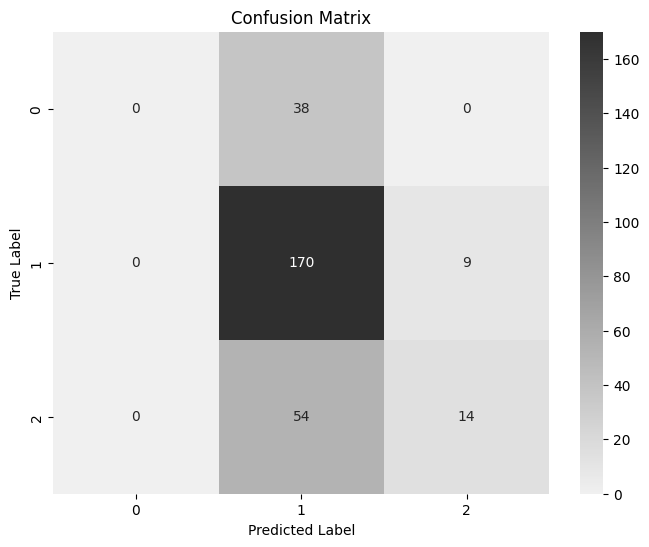

In [33]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_NaiveBayes.png')

# Menampilkan plot
plt.show()

In [334]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = scaler.transform([[harga, fasilitas]])
    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga sesuai


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h2>Data Resample<h2>

In [335]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

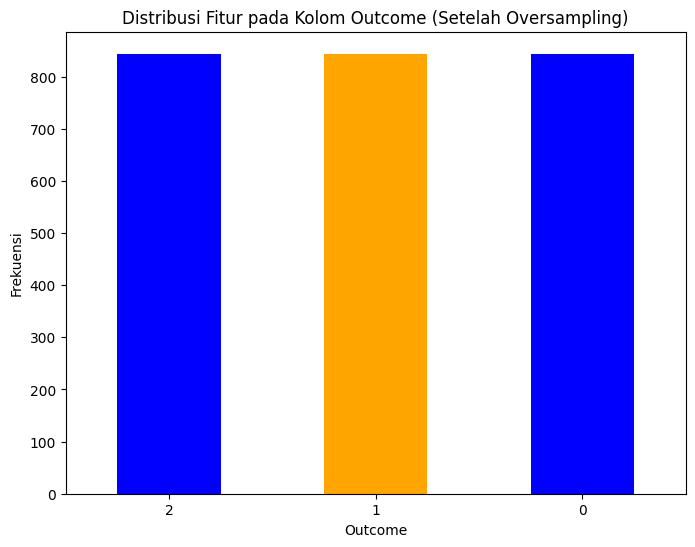

In [336]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Fitur pada Kolom Outcome (Setelah Oversampling)')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [337]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [338]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [339]:
# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [340]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [341]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67       166
           1       0.53      0.38      0.44       184
           2       0.60      0.43      0.50       157

    accuracy                           0.55       507
   macro avg       0.56      0.56      0.54       507
weighted avg       0.55      0.55      0.53       507



In [342]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.5522682445759369


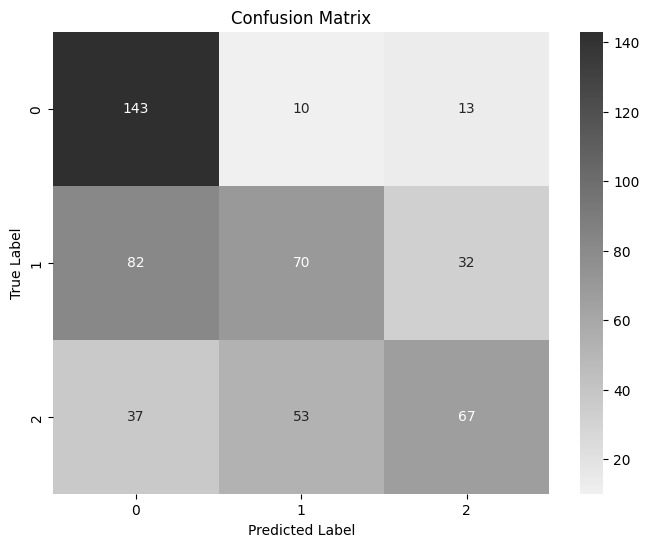

In [343]:
# Membuat dan menampilkan confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_naiveBayes.png')

# Menampilkan plot
plt.show()

In [344]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = scaler.transform([[harga, fasilitas]])
    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga sesuai


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h2>Penerapan Chi-square sebelum resampling<h2>

In [345]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X, y)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 65213284.94208518, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 8.339473319272175, p-value: 0.015456329863553666


In [346]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [347]:
model = GaussianNB()

In [348]:
k_features_range = range(1, X.shape[1] + 1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6807017543859649
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      1.00      0.80       179
           2       1.00      0.22      0.36        68

    accuracy                           0.68       285
   macro avg       0.55      0.41      0.39       285
weighted avg       0.65      0.68      0.59       285



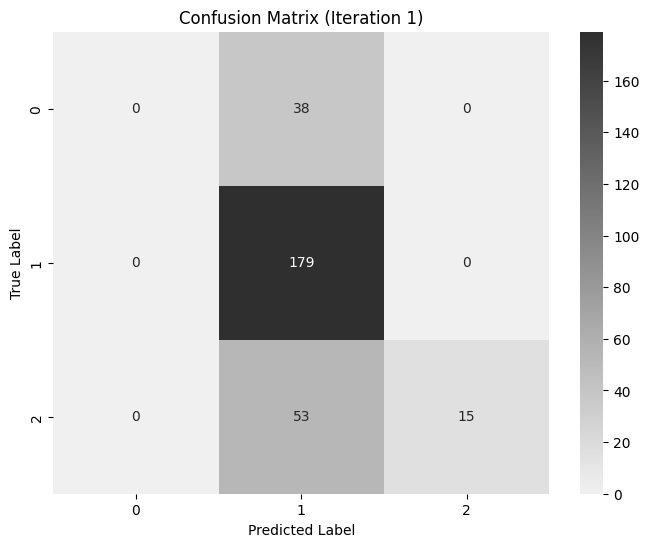



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.6807017543859649
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      1.00      0.80       179
           2       1.00      0.22      0.36        68

    accuracy                           0.68       285
   macro avg       0.55      0.41      0.39       285
weighted avg       0.65      0.68      0.59       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


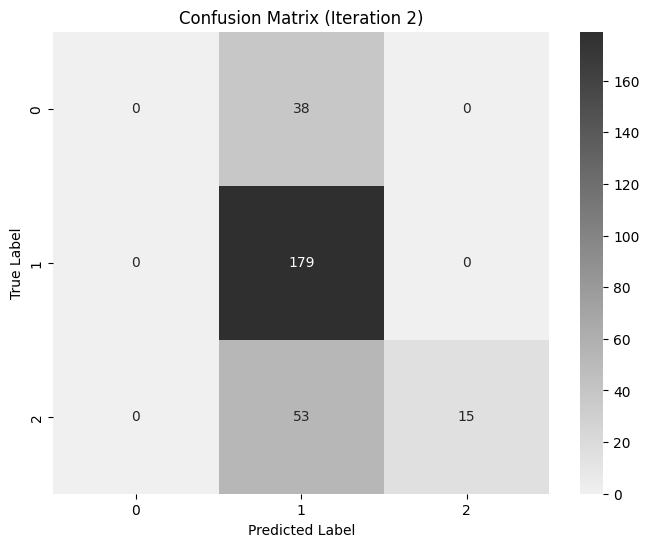

In [349]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan Chi-square setelah resampling<h2>

In [350]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [351]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X_resampled, y_resampled)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 163455976.05666184, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 20.90801186943577, p-value: 2.8832540369231292e-05


In [352]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [353]:
model = GaussianNB()

In [354]:
k_features_range = range(1, X_resampled.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.5502958579881657
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61       166
           1       0.58      0.34      0.43       184
           2       0.70      0.50      0.58       157

    accuracy                           0.55       507
   macro avg       0.59      0.56      0.54       507
weighted avg       0.58      0.55      0.54       507



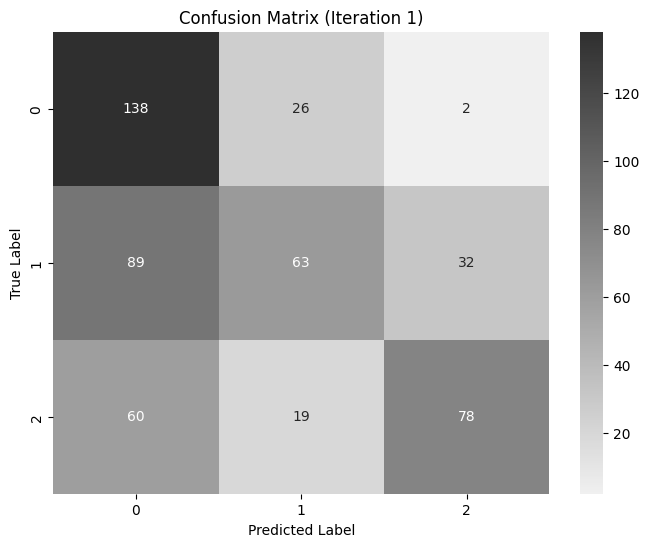



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.5502958579881657
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61       166
           1       0.58      0.34      0.43       184
           2       0.70      0.50      0.58       157

    accuracy                           0.55       507
   macro avg       0.59      0.56      0.54       507
weighted avg       0.58      0.55      0.54       507



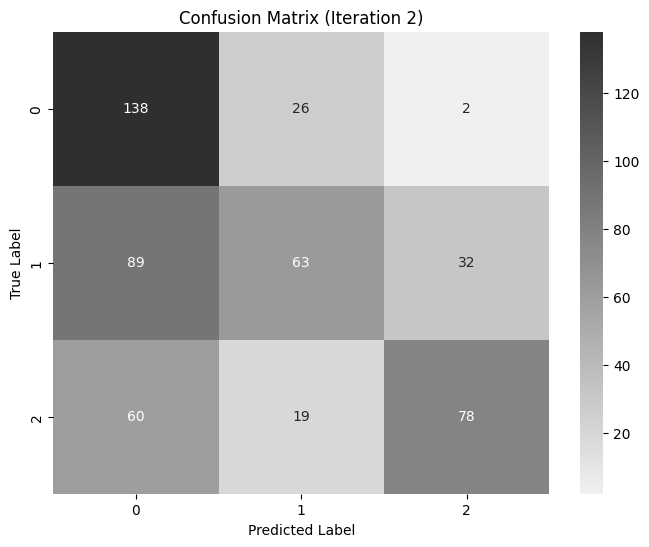

In [355]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X_resampled.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

In [356]:
def predict_outcome(harga, fasilitas):
    # Transform user input
    input_data = chi2_selector.transform([[harga, fasilitas]])
    input_data = scaler.transform(input_data)

    # Predict Outcome
    outcome = model.predict(input_data)[0]

    # Map outcome to descriptive text
    outcome_description = {0: 'harga murah', 1: 'harga sesuai', 2: 'harga mahal'}
    return outcome_description.get(outcome, 'Unknown outcome')

# Example usage:
user_harga = 1349000
user_fasilitas = 3
predicted_outcome = predict_outcome(user_harga, user_fasilitas)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: harga mahal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h2>Penerapan SFS-Forward Sebelum Resampling <h2>

In [357]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [358]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [359]:
model = GaussianNB()

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6807
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      1.00      0.80       179
           2       1.00      0.22      0.36        68

    accuracy                           0.68       285
   macro avg       0.55      0.41      0.39       285
weighted avg       0.65      0.68      0.59       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


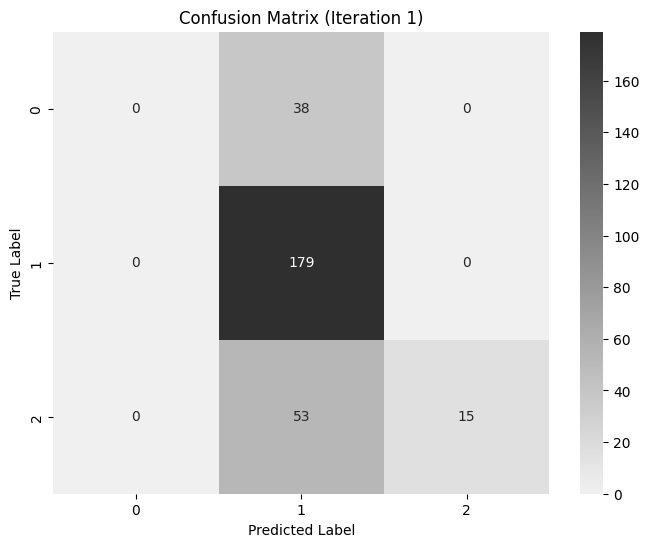



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.6456
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.65      0.95      0.77       179
           2       0.61      0.21      0.31        68

    accuracy                           0.65       285
   macro avg       0.42      0.39      0.36       285
weighted avg       0.55      0.65      0.56       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


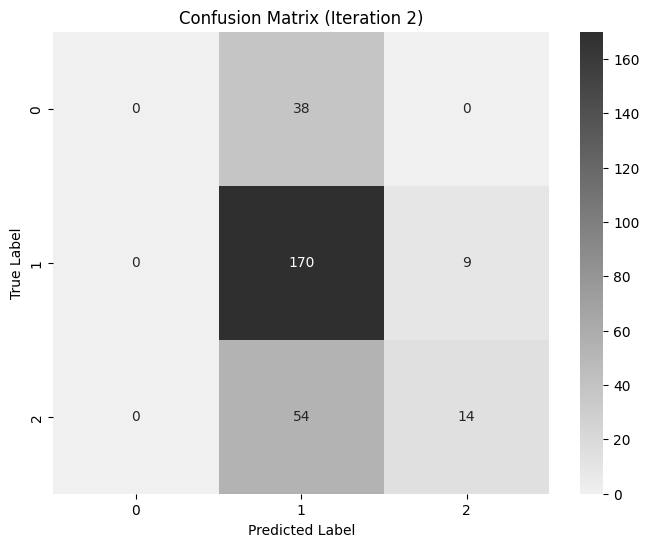

In [360]:
# Perform SFS with forward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)

for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=True,  # Forward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Setelah Resampling <h2>

In [361]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [362]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [363]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [364]:
model = GaussianNB()

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.5503
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61       166
           1       0.58      0.34      0.43       184
           2       0.70      0.50      0.58       157

    accuracy                           0.55       507
   macro avg       0.59      0.56      0.54       507
weighted avg       0.58      0.55      0.54       507





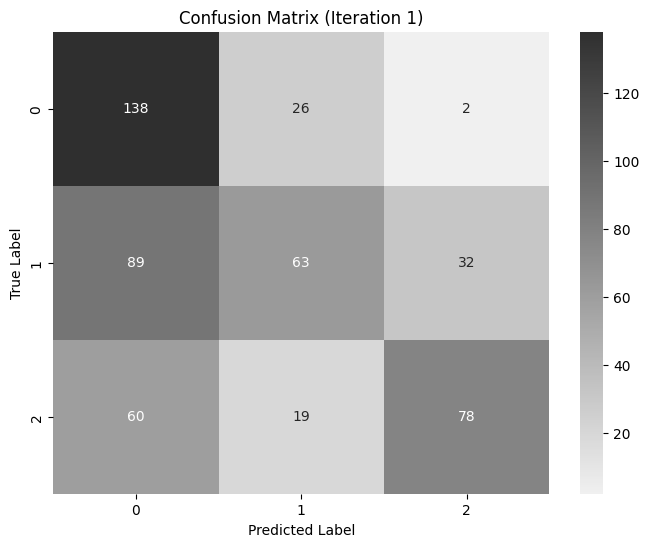



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.5523
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       166
           1       0.53      0.38      0.44       184
           2       0.60      0.43      0.50       157

    accuracy                           0.55       507
   macro avg       0.56      0.56      0.54       507
weighted avg       0.55      0.55      0.53       507





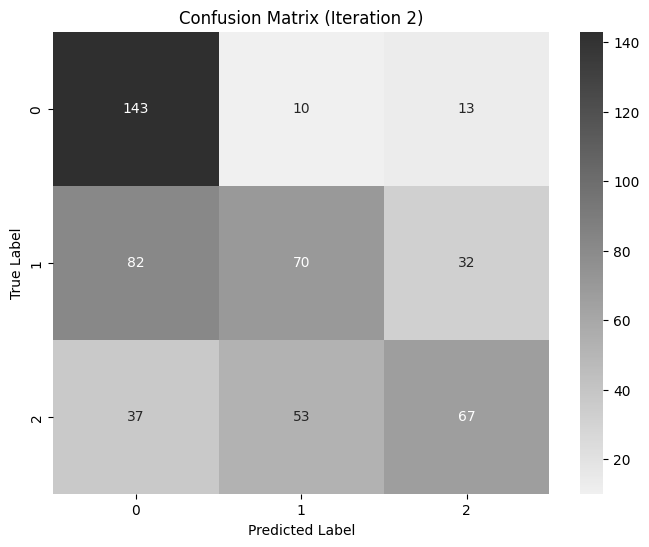

In [365]:
# Perform SFS with backward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward sebelum resampling<h2>

In [366]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [367]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [368]:
model = GaussianNB()

In [369]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.6807
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.66      1.00      0.80       179
           2       1.00      0.22      0.36        68

    accuracy                           0.68       285
   macro avg       0.55      0.41      0.39       285
weighted avg       0.65      0.68      0.59       285





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


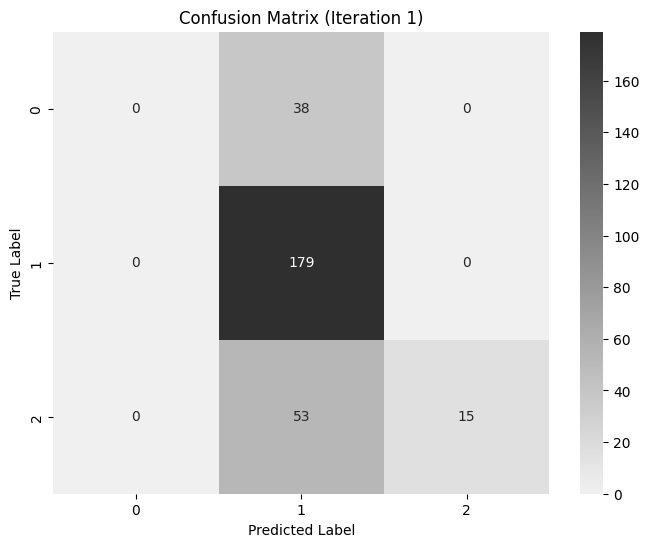



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.6456
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.65      0.95      0.77       179
           2       0.61      0.21      0.31        68

    accuracy                           0.65       285
   macro avg       0.42      0.39      0.36       285
weighted avg       0.55      0.65      0.56       285





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


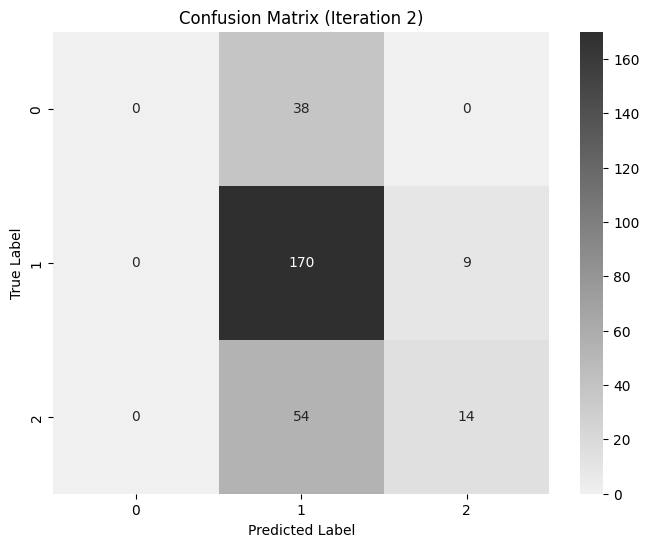

In [370]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward setelah resampling<h2>

In [371]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [372]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [373]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [374]:
model = GaussianNB()

In [375]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.5503
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61       166
           1       0.58      0.34      0.43       184
           2       0.70      0.50      0.58       157

    accuracy                           0.55       507
   macro avg       0.59      0.56      0.54       507
weighted avg       0.58      0.55      0.54       507





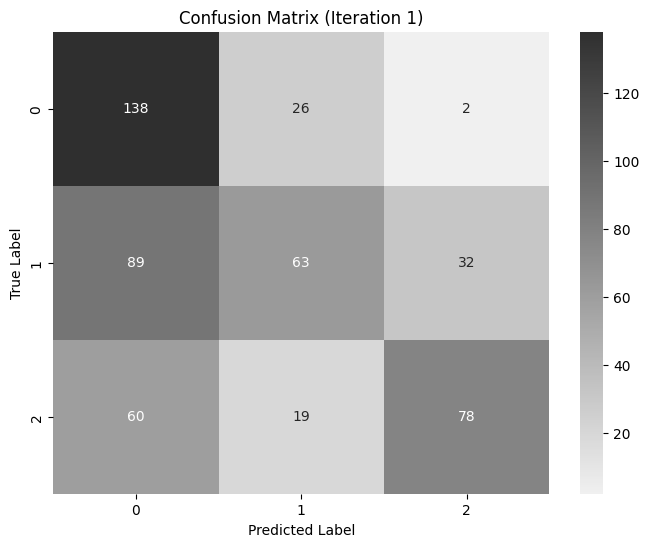



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.5523
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       166
           1       0.53      0.38      0.44       184
           2       0.60      0.43      0.50       157

    accuracy                           0.55       507
   macro avg       0.56      0.56      0.54       507
weighted avg       0.55      0.55      0.53       507





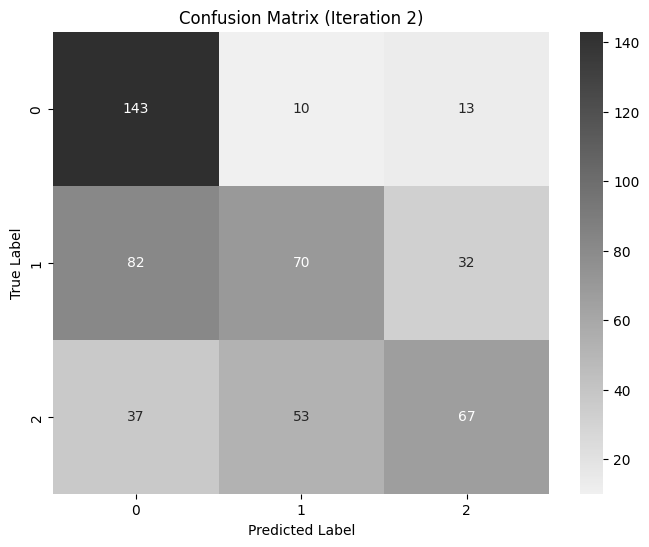

In [376]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>XGboost

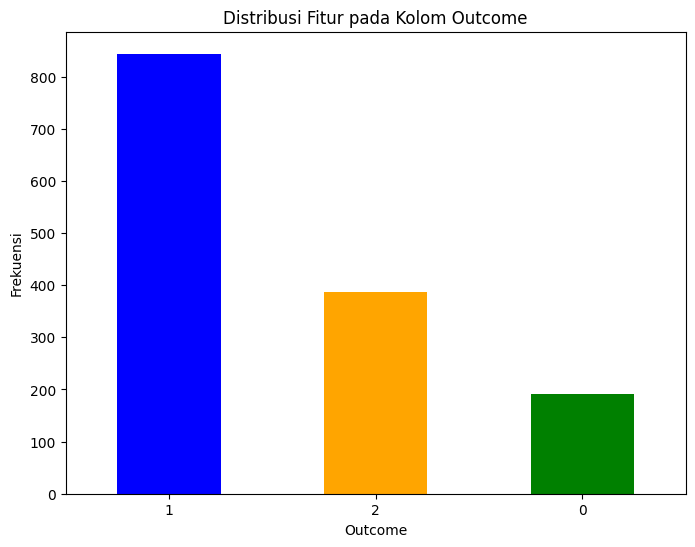

In [377]:
# Menampilkan diagram batang distribusi fitur pada kolom 'outcome'
# outcome_counts = data['Outcome'].value_counts()
outcome_counts = y.value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Fitur pada Kolom Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [378]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [379]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [380]:
# Membuat dan melatih model XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [381]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



In [383]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9543859649122807


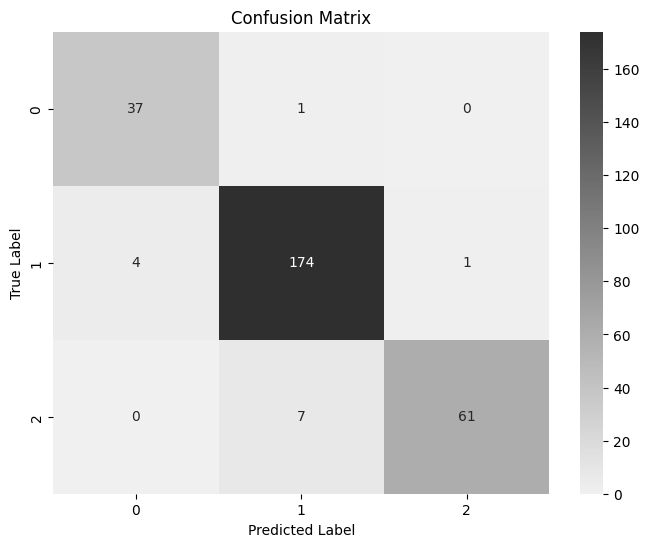

In [384]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_XGBoost.png')

# Menampilkan plot
plt.show()

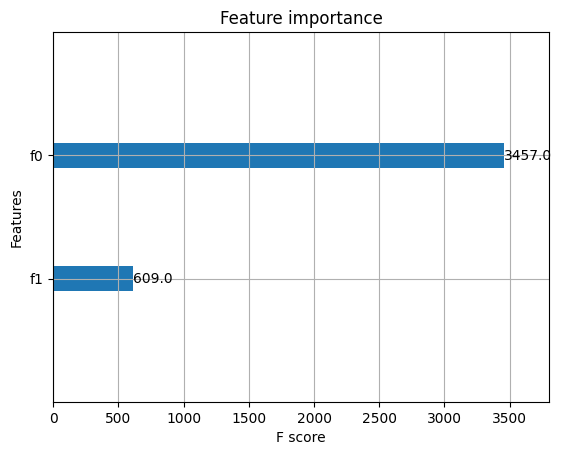

In [385]:
# Visualisasi fitur penting
xgb.plot_importance(model)
plt.show()

<h2>Data Resample<h2>

In [386]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

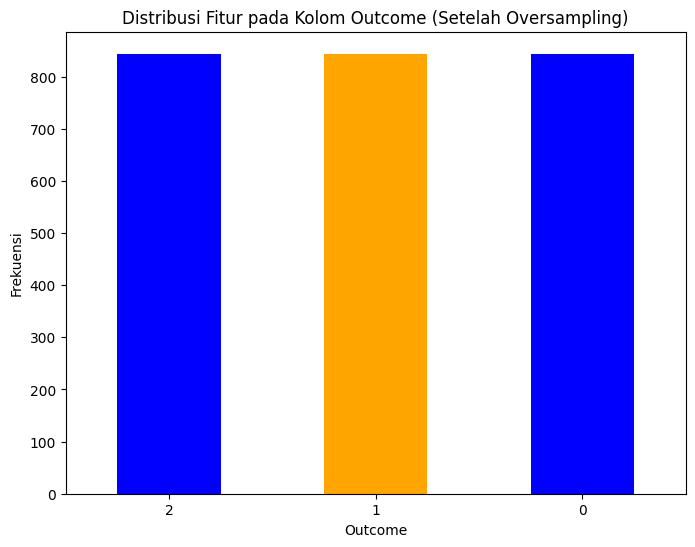

In [387]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Fitur pada Kolom Outcome (Setelah Oversampling)')
plt.xlabel('Outcome')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

In [34]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [35]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [36]:
# Membuat dan melatih model XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       166
           1       0.93      0.96      0.94       184
           2       0.96      0.96      0.96       157

    accuracy                           0.95       507
   macro avg       0.96      0.95      0.96       507
weighted avg       0.96      0.95      0.95       507



In [39]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9546351084812623


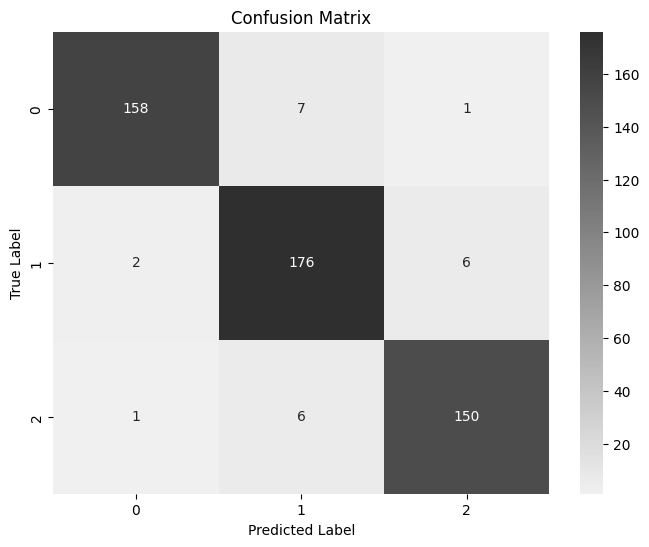

In [40]:
# Membuat confusion matrix
light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Menyimpan plot dalam bentuk gambar
plt.savefig('confusion_matrix_XGBoost.png')

# Menampilkan plot
plt.show()


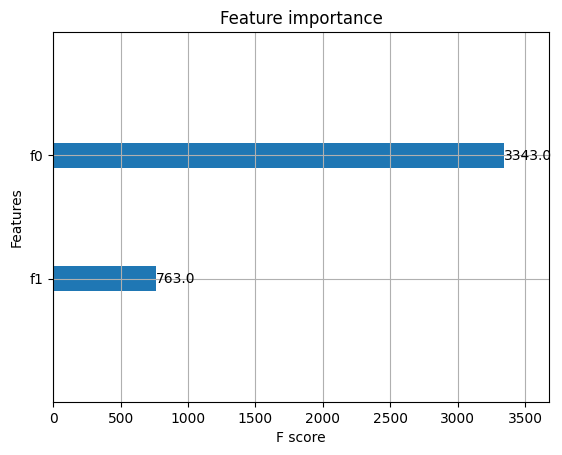

In [395]:
# Visualisasi fitur penting
xgb.plot_importance(model)
plt.show()

<h2>Penerapan Chi-square sebelum resampling<h2>

In [396]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X, y)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 65213284.94208518, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 8.339473319272175, p-value: 0.015456329863553666


In [397]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [399]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7578947368421053
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.88      0.82       179
           2       0.76      0.60      0.67        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.68       285
weighted avg       0.75      0.76      0.75       285



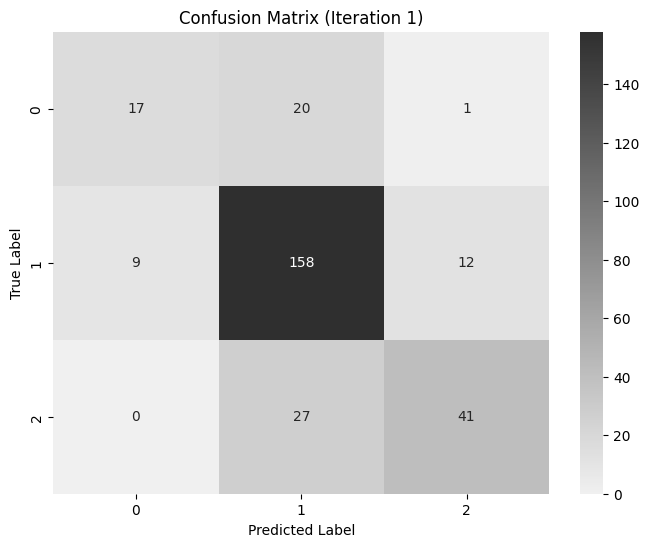



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9543859649122807
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



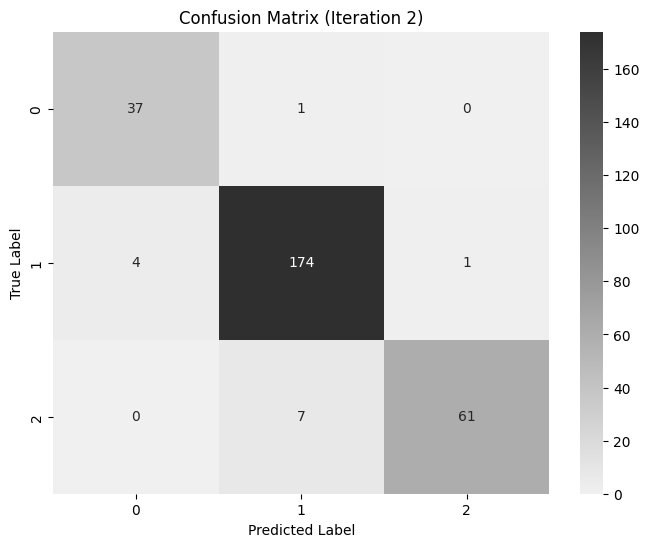

In [400]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan Chi-square setelah resampling<h2>

In [401]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [402]:
# Hitung nilai Chi-Square dan p-values
chi2_scores, p_values = chi2(X_resampled, y_resampled)
for feature, score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Fitur: {feature}, Chi-Square: {score}, p-value: {p_value}")

Fitur: Harga, Chi-Square: 163455976.05666184, p-value: 0.0
Fitur: Fasilitas, Chi-Square: 20.90801186943577, p-value: 2.8832540369231292e-05


In [403]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [404]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [405]:
k_features_range = range(1, X_resampled.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7120315581854043
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       166
           1       0.68      0.64      0.66       184
           2       0.77      0.67      0.72       157

    accuracy                           0.71       507
   macro avg       0.72      0.71      0.71       507
weighted avg       0.71      0.71      0.71       507



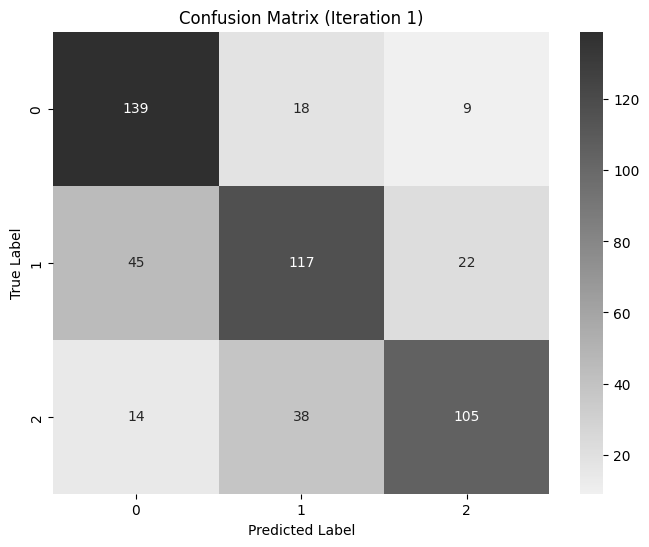



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9546351084812623
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       166
           1       0.93      0.96      0.94       184
           2       0.96      0.96      0.96       157

    accuracy                           0.95       507
   macro avg       0.96      0.95      0.96       507
weighted avg       0.96      0.95      0.95       507



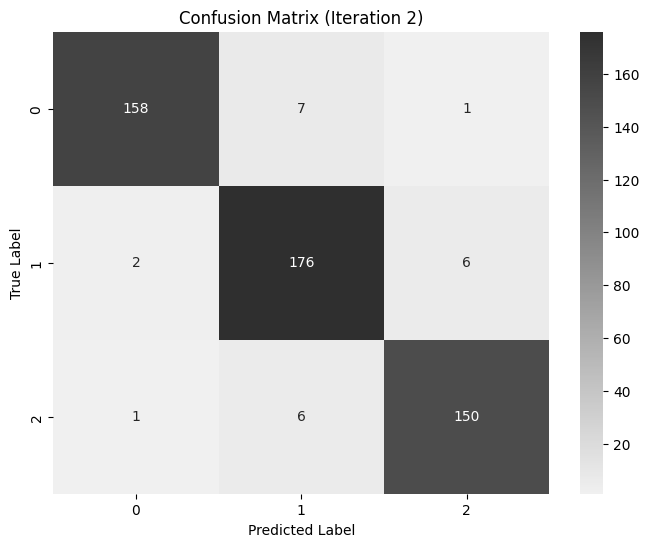

In [406]:
for k in k_features_range:
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
    X_test_chi2 = chi2_selector.transform(X_test)

    selected_features = chi2_selector.get_support(indices=True)
    selected_feature_names = [X_resampled.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Train the model with the selected features
    model.fit(X_train_chi2, y_train)

    # Predict test set
    y_pred = model.predict(X_test_chi2)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    # plt.savefig(f'confusion_matrix_ChiSquare_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Sebelum Resampling <h2>

In [407]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [408]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [409]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7579
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.88      0.82       179
           2       0.76      0.60      0.67        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.68       285
weighted avg       0.75      0.76      0.75       285



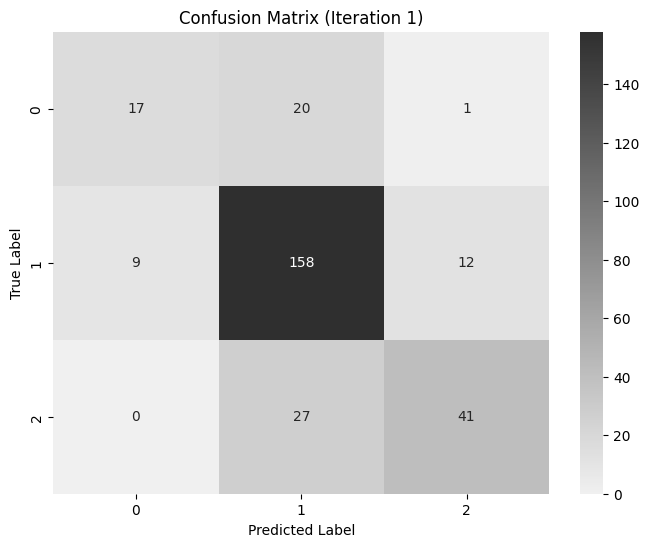



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285



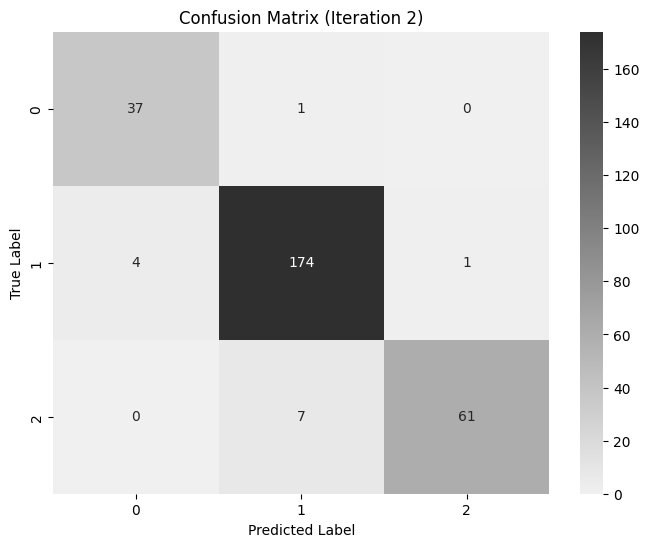

In [410]:
# Perform SFS with forward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)

for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=True,  # Forward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

<h2>Penerapan SFS-Forward Setelah Resampling <h2>

In [411]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [412]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [413]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [414]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7120
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       166
           1       0.68      0.64      0.66       184
           2       0.77      0.67      0.72       157

    accuracy                           0.71       507
   macro avg       0.72      0.71      0.71       507
weighted avg       0.71      0.71      0.71       507





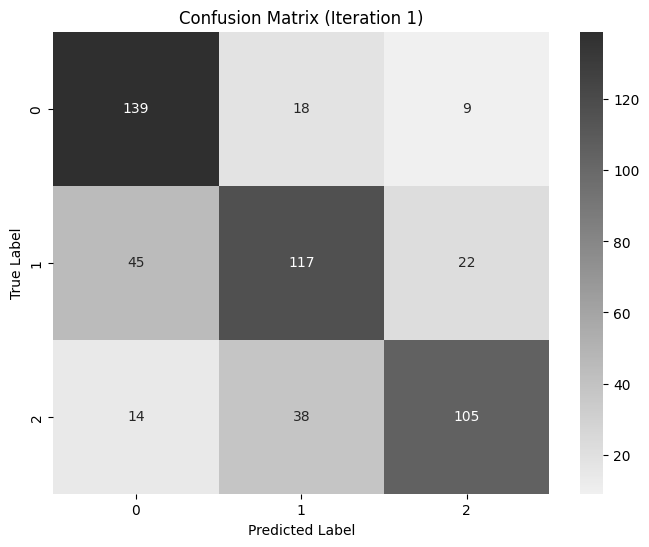



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9546
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       166
           1       0.93      0.96      0.94       184
           2       0.96      0.96      0.96       157

    accuracy                           0.95       507
   macro avg       0.96      0.95      0.96       507
weighted avg       0.96      0.95      0.95       507





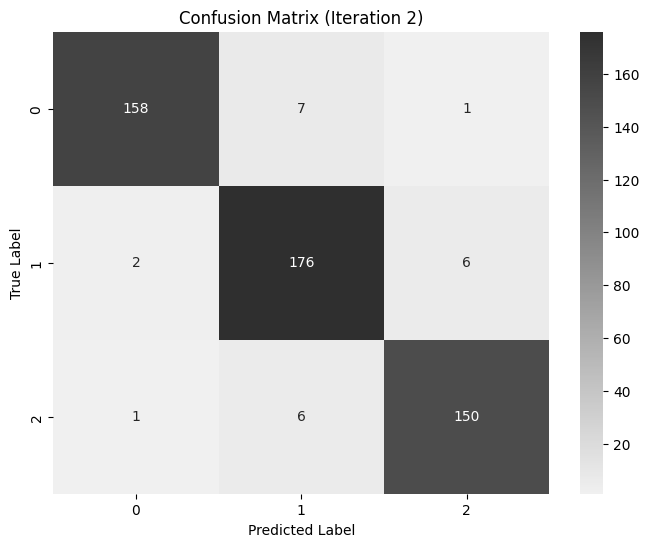

In [415]:
# Perform SFS with backward selection for each k in k_features_range
k_features_range = range(1, X.shape[1] + 1)
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward sebelum resampling<h2>

In [416]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [417]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [418]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [419]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7579
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.88      0.82       179
           2       0.76      0.60      0.67        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.68       285
weighted avg       0.75      0.76      0.75       285





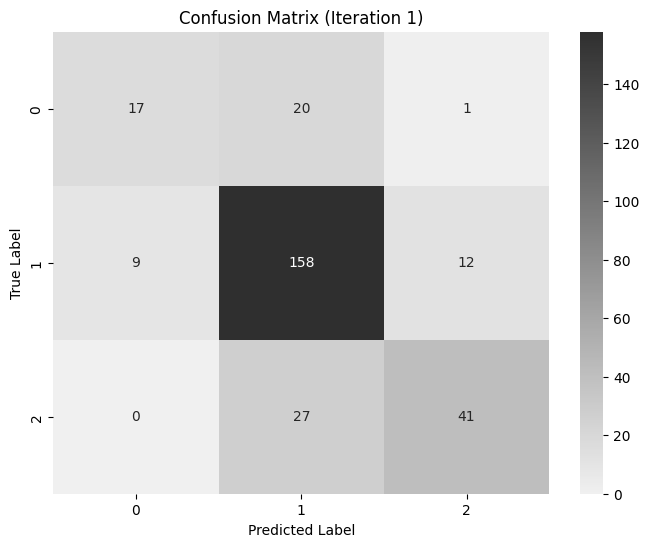



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285





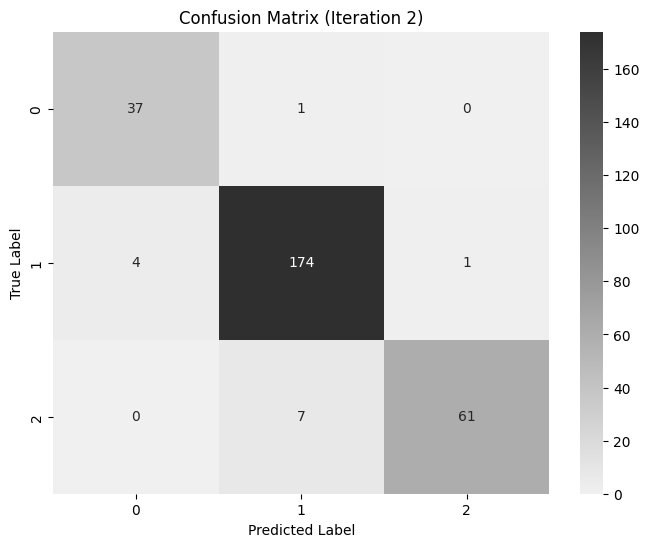

In [420]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")



<h2>penerapan sfs-backward setelah resampling<h2>

In [421]:
# Melakukan oversampling dengan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [422]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [423]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [424]:
k_features_range = range(1, X.shape[1] + 1)

Iteration 1 - Selected Features: ['Harga']
Accuracy: 0.7579
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.77      0.88      0.82       179
           2       0.76      0.60      0.67        68

    accuracy                           0.76       285
   macro avg       0.73      0.64      0.68       285
weighted avg       0.75      0.76      0.75       285





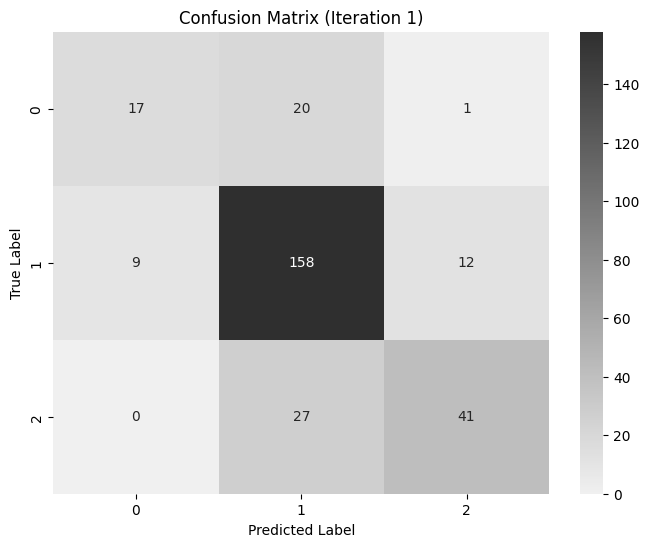



Iteration 2 - Selected Features: ['Harga', 'Fasilitas']
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.96      0.97      0.96       179
           2       0.98      0.90      0.94        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.95      0.95       285





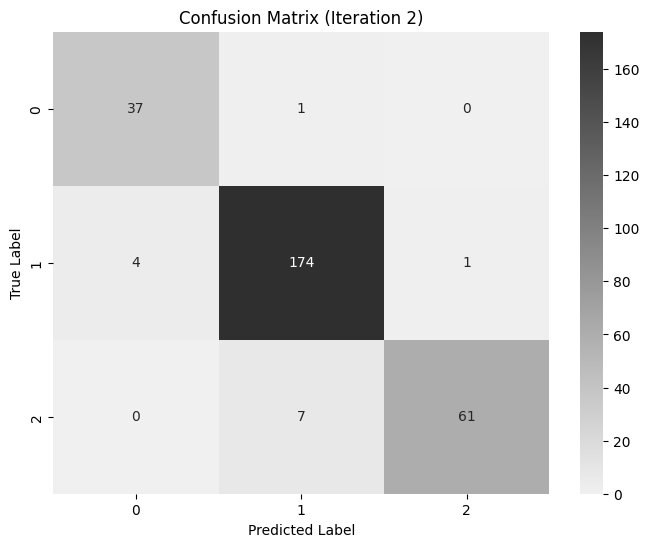

In [425]:
# Perform SFS with backward selection for each k in k_features_range
for k in k_features_range:
    sfs = SFS(model,
              k_features=k,
              forward=False,  # Backward selection
              floating=False,
              scoring='accuracy',
              cv=3,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    selected_features = list(sfs.k_feature_idx_)
    selected_feature_names = [X.columns[i] for i in selected_features]
    print(f"Iteration {k} - Selected Features: {selected_feature_names}")

    # Transform the training and testing sets
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Train the model with the selected features
    model.fit(X_train_sfs, y_train)

    # Predict test set
    y_pred = model.predict(X_test_sfs)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results for the current iteration
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

    # Confusion matrix
    light_grey_cmap = LinearSegmentedColormap.from_list('light_grey', ['#f0f0f0', '#2f2f2f'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_grey_cmap)
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Save the plot
    plt.savefig(f'confusion_matrix_SFS_Forward_{k}.png')

    # Show the plot
    plt.show()
    print("\n")

